In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from datetime import datetime
from datetime import timedelta
import glob

In [3]:
# Caminhos dos diretórios raiz                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg

states = ['PARÁ', 'AMAPÁ', 'RORAIMA', 'AMAZONAS', 'MARANHÃO', 'CEARÁ', 'PIAUÍ', 'PERNAMBUCO', 
          'RIO GRANDE DO NORTE', 'TOCANTINS', 'PARAÍBA', 'ACRE', 'ALAGOAS', 'BAHIA', 'MATO GROSSO',
          'RONDÔNIA', 'SERGIPE', 'GOIÁS', 'MINAS GERAIS', 'DISTRITO FEDERAL', 'MATO GROSSO DO SUL',
          'ESPÍRITO SANTO', 'SÃO PAULO', 'RIO DE JANEIRO', 'PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

### Reading hdf files ###

In [4]:
df_filter_pr = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_1855_2022_PR450.h5')
df_filter_pr

Date  Value      Code  Year
0         1958-01-01    0.0  00047000  1958
1         1958-01-02    0.0  00047000  1958
2         1958-01-03    0.0  00047000  1958
3         1958-01-04    0.0  00047000  1958
4         1958-01-05    4.8  00047000  1958
...              ...    ...       ...   ...
128939050 1996-02-25   25.8  08560000  1996
128939051 1996-02-26    0.0  08560000  1996
128939052 1996-02-27    0.0  08560000  1996
128939053 1996-02-28    0.0  08560000  1996
128939054 1996-02-29    0.0  08560000  1996

[128939055 rows x 4 columns]

In [5]:
df_gauges = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_NOT_CEMADEN_LIST_GAUGES.h5')
df_gauges = df_gauges[["Code", "State"]]
df_gauges

Code    State
0      00047000     PARÁ
1      00047002     PARÁ
2      00047003     PARÁ
3      00047004     PARÁ
4      00047005     PARÁ
...         ...      ...
11721  08460003  RORAIMA
11722  08460004  RORAIMA
11723  08461000  RORAIMA
11724  08464001  RORAIMA
11725  08560000  RORAIMA

[11726 rows x 2 columns]

In [6]:
df_filter_pr_state = df_filter_pr.merge(df_gauges, how = 'left', on = 'Code')
df_filter_pr_state

Date  Value      Code  Year    State
0         1958-01-01    0.0  00047000  1958     PARÁ
1         1958-01-02    0.0  00047000  1958     PARÁ
2         1958-01-03    0.0  00047000  1958     PARÁ
3         1958-01-04    0.0  00047000  1958     PARÁ
4         1958-01-05    4.8  00047000  1958     PARÁ
...              ...    ...       ...   ...      ...
128939050 1996-02-25   25.8  08560000  1996  RORAIMA
128939051 1996-02-26    0.0  08560000  1996  RORAIMA
128939052 1996-02-27    0.0  08560000  1996  RORAIMA
128939053 1996-02-28    0.0  08560000  1996  RORAIMA
128939054 1996-02-29    0.0  08560000  1996  RORAIMA

[128939055 rows x 5 columns]

In [7]:
state = states[0]
df_filter_pr_state_filter = df_filter_pr_state[(df_filter_pr_state['State'] == state)]
station_list = df_filter_pr_state_filter['Code'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
df_q_mt = pd.DataFrame(columns = ["Code", "Year", "Threshold"])
station = station_list[4]
df_temp_station = df_filter_pr_state_filter[(df_filter_pr_state_filter['Code'] == station)]
df_temp_station['Month'] = df_temp_station['Date'].dt.month
df_temp_station

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3639143619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


Date  Value      Code  Year State  Month
46122 1989-08-21    0.0  00047005  1989  PARÁ      8
46123 1989-08-22    0.0  00047005  1989  PARÁ      8
46124 1989-08-23    9.8  00047005  1989  PARÁ      8
46125 1989-08-24    5.1  00047005  1989  PARÁ      8
46126 1989-08-25    0.0  00047005  1989  PARÁ      8
...          ...    ...       ...   ...   ...    ...
57270 2022-02-24    0.0  00047005  2022  PARÁ      2
57271 2022-02-25    0.0  00047005  2022  PARÁ      2
57272 2022-02-26    0.0  00047005  2022  PARÁ      2
57273 2022-02-27   20.4  00047005  2022  PARÁ      2
57274 2022-02-28   20.6  00047005  2022  PARÁ      2

[11153 rows x 6 columns]

In [8]:
df_threshold = df_temp_station[df_temp_station['Value']>= 1.0]
df_threshold = df_threshold.reset_index(drop = True, inplace=False)
df_threshold

Date  Value      Code  Year State  Month
0    1989-08-23    9.8  00047005  1989  PARÁ      8
1    1989-08-24    5.1  00047005  1989  PARÁ      8
2    1989-09-13    1.2  00047005  1989  PARÁ      9
3    1989-09-29    9.6  00047005  1989  PARÁ      9
4    1989-09-30    8.5  00047005  1989  PARÁ      9
...         ...    ...       ...   ...   ...    ...
3511 2022-02-15    7.8  00047005  2022  PARÁ      2
3512 2022-02-21    8.9  00047005  2022  PARÁ      2
3513 2022-02-22    8.7  00047005  2022  PARÁ      2
3514 2022-02-27   20.4  00047005  2022  PARÁ      2
3515 2022-02-28   20.6  00047005  2022  PARÁ      2

[3516 rows x 6 columns]

In [9]:
df_month = pd.DataFrame(df_threshold['Month'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist(), columns=['Month'])
df_month = df_month.sort_values(['Month'], ignore_index=True)
list_month = df_month['Month'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
list_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [10]:
upper_whisker_list = []
for i in list_month:
    df_threshold_temp = df_threshold[(df_threshold['Month'] == i)]
#     print(df_threshold_temp)
    first_quartile = df_threshold_temp['Value'].quantile(0.25)
    thrid_quartile = df_threshold_temp['Value'].quantile(0.75)
    iqr = thrid_quartile - first_quartile
    upper_whisker = thrid_quartile + 1.5 * iqr
    upper_whisker_list.append(upper_whisker)
    print('iqr', iqr,"month", i)
    print('thrid_quartile', thrid_quartile,"month", i)
    print('upper_whisker', upper_whisker,"month", i)
print('upper_whisker_list',upper_whisker_list)

iqr 29.025 month 1
thrid_quartile 35.525 month 1
upper_whisker 79.0625 month 1
iqr 31.7 month 2
thrid_quartile 40.0 month 2
upper_whisker 87.55 month 2
iqr 36.775 month 3
thrid_quartile 45.75 month 3
upper_whisker 100.9125 month 3
iqr 26.325000000000003 month 4
thrid_quartile 34.1 month 4
upper_whisker 73.5875 month 4
iqr 25.300000000000004 month 5
thrid_quartile 32.2 month 5
upper_whisker 70.15 month 5
iqr 18.299999999999997 month 6
thrid_quartile 22.799999999999997 month 6
upper_whisker 50.24999999999999 month 6
iqr 16.450000000000003 month 7
thrid_quartile 21.35 month 7
upper_whisker 46.025000000000006 month 7
iqr 16.75 month 8
thrid_quartile 21.25 month 8
upper_whisker 46.375 month 8
iqr 6.9 month 9
thrid_quartile 9.8 month 9
upper_whisker 20.150000000000002 month 9
iqr 17.049999999999997 month 10
thrid_quartile 21.2 month 10
upper_whisker 46.77499999999999 month 10
iqr 16.424999999999997 month 11
thrid_quartile 20.4 month 11
upper_whisker 45.037499999999994 month 11
iqr 22.0 month

In [11]:
df_quartile_threshold = pd.DataFrame(list(zip(list_month, upper_whisker_list)),
                                             columns =['Month', 'Upper Whisker'])
df_quartile_threshold

Month  Upper Whisker
0       1        79.0625
1       2        87.5500
2       3       100.9125
3       4        73.5875
4       5        70.1500
5       6        50.2500
6       7        46.0250
7       8        46.3750
8       9        20.1500
9      10        46.7750
10     11        45.0375
11     12        59.7000

In [12]:
year_list = df_temp_station['Year'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
year = year_list[0]
df_temp_station_year = df_temp_station[(df_temp_station['Year'] == year)]
df_temp_station_year

Date  Value      Code  Year State  Month
46122 1989-08-21    0.0  00047005  1989  PARÁ      8
46123 1989-08-22    0.0  00047005  1989  PARÁ      8
46124 1989-08-23    9.8  00047005  1989  PARÁ      8
46125 1989-08-24    5.1  00047005  1989  PARÁ      8
46126 1989-08-25    0.0  00047005  1989  PARÁ      8
...          ...    ...       ...   ...   ...    ...
46250 1989-12-27    9.3  00047005  1989  PARÁ     12
46251 1989-12-28   63.6  00047005  1989  PARÁ     12
46252 1989-12-29    9.6  00047005  1989  PARÁ     12
46253 1989-12-30   27.7  00047005  1989  PARÁ     12
46254 1989-12-31   28.1  00047005  1989  PARÁ     12

[133 rows x 6 columns]

In [13]:
count_ops = len(df_temp_station_year)
min_date = min(df_temp_station_year['Date'])
max_date = max(df_temp_station_year['Date'])
first_day = datetime(year, 1, 1)
last_day = datetime(year + 1, 1, 1)
date_list = []
today = first_day
while today < last_day:
    date_list.append(today)
    today = today + timedelta(days=1)
df_date_list = pd.DataFrame(date_list, columns=['Date'])
df_analysis = df_date_list.merge(df_temp_station_year, how = 'left', on  = 'Date')
df_analysis = df_analysis.sort_values(['Date'], ignore_index=True)
len_period = len(df_analysis)
df_analysis

Date  Value      Code    Year State  Month
0   1989-01-01    NaN       NaN     NaN   NaN    NaN
1   1989-01-02    NaN       NaN     NaN   NaN    NaN
2   1989-01-03    NaN       NaN     NaN   NaN    NaN
3   1989-01-04    NaN       NaN     NaN   NaN    NaN
4   1989-01-05    NaN       NaN     NaN   NaN    NaN
..         ...    ...       ...     ...   ...    ...
360 1989-12-27    9.3  00047005  1989.0  PARÁ   12.0
361 1989-12-28   63.6  00047005  1989.0  PARÁ   12.0
362 1989-12-29    9.6  00047005  1989.0  PARÁ   12.0
363 1989-12-30   27.7  00047005  1989.0  PARÁ   12.0
364 1989-12-31   28.1  00047005  1989.0  PARÁ   12.0

[365 rows x 6 columns]

In [14]:
df_merge = df_analysis.merge(df_quartile_threshold, how="left", on ='Month')
df_merge

Date  Value      Code    Year State  Month  Upper Whisker
0   1989-01-01    NaN       NaN     NaN   NaN    NaN            NaN
1   1989-01-02    NaN       NaN     NaN   NaN    NaN            NaN
2   1989-01-03    NaN       NaN     NaN   NaN    NaN            NaN
3   1989-01-04    NaN       NaN     NaN   NaN    NaN            NaN
4   1989-01-05    NaN       NaN     NaN   NaN    NaN            NaN
..         ...    ...       ...     ...   ...    ...            ...
360 1989-12-27    9.3  00047005  1989.0  PARÁ   12.0           59.7
361 1989-12-28   63.6  00047005  1989.0  PARÁ   12.0           59.7
362 1989-12-29    9.6  00047005  1989.0  PARÁ   12.0           59.7
363 1989-12-30   27.7  00047005  1989.0  PARÁ   12.0           59.7
364 1989-12-31   28.1  00047005  1989.0  PARÁ   12.0           59.7

[365 rows x 7 columns]

In [15]:
df_merge['Validation Count'] = np.where(df_merge['Value'] > df_merge['Upper Whisker'], 0, 1)
df_merge.tail(60)

Date  Value      Code    Year State  Month  Upper Whisker  \
305 1989-11-02    9.4  00047005  1989.0  PARÁ   11.0        45.0375   
306 1989-11-03    9.3  00047005  1989.0  PARÁ   11.0        45.0375   
307 1989-11-04    8.6  00047005  1989.0  PARÁ   11.0        45.0375   
308 1989-11-05    6.2  00047005  1989.0  PARÁ   11.0        45.0375   
309 1989-11-06    9.2  00047005  1989.0  PARÁ   11.0        45.0375   
310 1989-11-07    9.4  00047005  1989.0  PARÁ   11.0        45.0375   
311 1989-11-08    9.4  00047005  1989.0  PARÁ   11.0        45.0375   
312 1989-11-09    6.1  00047005  1989.0  PARÁ   11.0        45.0375   
313 1989-11-10    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
314 1989-11-11    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
315 1989-11-12    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
316 1989-11-13    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
317 1989-11-14    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
318 1989-11-15    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
319 1989-11-16    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
320 1989-11-17    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
321 1989-11-18    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
322 1989-11-19    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
323 1989-11-20    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
324 1989-11-21    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
325 1989-11-22    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
326 1989-11-23    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
327 1989-11-24    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
328 1989-11-25    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
329 1989-11-26    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
330 1989-11-27    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
331 1989-11-28    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
332 1989-11-29    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
333 1989-11-30    0.0  00047005  1989.0  PARÁ   11.0        45.0375   
334 1989-12-01    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
335 1989-12-02    0.9  00047005  1989.0  PARÁ   12.0        59.7000   
336 1989-12-03    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
337 1989-12-04    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
338 1989-12-05    4.6  00047005  1989.0  PARÁ   12.0        59.7000   
339 1989-12-06    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
340 1989-12-07    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
341 1989-12-08    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
342 1989-12-09    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
343 1989-12-10    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
344 1989-12-11    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
345 1989-12-12    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
346 1989-12-13    9.7  00047005  1989.0  PARÁ   12.0        59.7000   
347 1989-12-14    6.9  00047005  1989.0  PARÁ   12.0        59.7000   
348 1989-12-15    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
349 1989-12-16    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
350 1989-12-17    7.4  00047005  1989.0  PARÁ   12.0        59.7000   
351 1989-12-18    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
352 1989-12-19    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
353 1989-12-20    9.5  00047005  1989.0  PARÁ   12.0        59.7000   
354 1989-12-21    9.8  00047005  1989.0  PARÁ   12.0        59.7000   
355 1989-12-22    4.0  00047005  1989.0  PARÁ   12.0        59.7000   
356 1989-12-23    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
357 1989-12-24    0.0  00047005  1989.0  PARÁ   12.0        59.7000   
358 1989-12-25    3.9  00047005  1989.0  PARÁ   12.0        59.7000   
359 1989-12-26    9.5  00047005  1989.0  PARÁ   12.0        59.7000   
360 1989-12-27    9.3  00047005  1

In [16]:
upper_validation = df_merge['Validation Count'].sum()
upper_validation

364

In [17]:
q_outlier = 100.0 * upper_validation / len_period
q_outlier

99.72602739726027

### FUNCTION

In [36]:
def calculateP(state):
    df_filter_pr_state_filter = df_filter_pr_state[(df_filter_pr_state['State'] == state)]
    station_list = df_filter_pr_state_filter['Code'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
    df_q_outlier = pd.DataFrame(columns = ["Code", "Year", "Outlier"])
    count = 0
    print(state)
    for station in station_list:
        count = count + 1
        df_temp_station = df_filter_pr_state_filter[(df_filter_pr_state_filter['Code'] == station)]
        df_temp_station['Month'] = df_temp_station['Date'].dt.month
        df_threshold = df_temp_station[df_temp_station['Value']>= 1.0]
        df_threshold = df_threshold.reset_index(drop = True, inplace=False)
        df_month = pd.DataFrame(df_threshold['Month'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist(), columns=['Month'])
        df_month = df_month.sort_values(['Month'], ignore_index=True)
        list_month = df_month['Month'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
        upper_whisker_list = []
        for i in list_month:
            df_threshold_temp = df_threshold[(df_threshold['Month'] == i)]
        #     print(df_threshold_temp)
            first_quartile = df_threshold_temp['Value'].quantile(0.25)
            thrid_quartile = df_threshold_temp['Value'].quantile(0.75)
            iqr = thrid_quartile - first_quartile
            upper_whisker = thrid_quartile + 1.5 * iqr
            upper_whisker_list.append(upper_whisker)
#             print('iqr', iqr,"month", i)
#             print('thrid_quartile', thrid_quartile,"month", i)
#             print('upper_whisker', upper_whisker,"month", i)
#         print('upper_whisker_list',upper_whisker_list)
        df_quartile_threshold = pd.DataFrame(list(zip(list_month, upper_whisker_list)), columns =['Month', 'Upper Whisker'])
        print(count, '/', len(station_list))
        year_list = df_temp_station['Year'].drop_duplicates().reset_index(drop = True, inplace = False).values.tolist()
#         print(year_list)
        list_code = []
        list_year = []
        list_outlier= []
        for year in year_list:
            ### FILTERING BY YEAR ###
            df_temp_station_year = df_temp_station[(df_temp_station['Year'] == year)]
            count_ops = len(df_temp_station_year)
            min_date = min(df_temp_station_year['Date'])
            max_date = max(df_temp_station_year['Date'])
            first_day = datetime(year, 1, 1)
            last_day = datetime(year + 1, 1, 1)
            date_list = []
            today = first_day
            while today < last_day:
                date_list.append(today)
                today = today + timedelta(days=1)
            df_date_list = pd.DataFrame(date_list, columns=['Date'])
            df_analysis = df_date_list.merge(df_temp_station_year, how = 'left', on  = 'Date')
            df_analysis = df_analysis.sort_values(['Date'], ignore_index=True)
            len_period = len(df_analysis)
            df_merge = df_analysis.merge(df_quartile_threshold, how="left", on ='Month')
            df_merge['Validation Count'] = np.where(df_merge['Value'] > df_merge['Upper Whisker'], 0, 1)
            upper_validation = df_merge['Validation Count'].sum()
            q_outlier = 100.0 * upper_validation / len_period
#             print(q_outlier)
            list_code.append(station)
            list_year.append(year)
            list_outlier.append(q_outlier)
    #     print(list_code)
    #     print(list_year)
    #     print(list_yearly_availabity)
#         print(list_outlier)
        df_station_outlier = pd.DataFrame(list(zip(list_code, list_year, list_outlier)),
                                             columns =['Code', 'Year', 'Outlier'])
        df_q_outlier = pd.concat([df_q_outlier, df_station_outlier], ignore_index = True)
        df_q_outlier['State'] = state
    df_q_outlier.to_hdf(general_path + '/Quality/Q3/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
    data = np.array(df_q_outlier['Outlier'])
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.hist(data, bins = 10, edgecolor='black', color = 'grey') #data and number of bins
    tnr = {'fontname':'Times New Roman', 'fontsize':12}
#     plt.xlim(0, 100)
#     plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.tight_layout()
    plt.savefig(general_path+'/Figures/q3_outlier_'+state+'.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
    plt.show()
    plt.close()
    print(general_path+'/Figures/q3_outlier_'+state+'.jpeg')
    print("mean", data.mean())
    print("median", statistics.median(data))
    print("mode", statistics.mode(data))
    print(df_q_outlier.head(10))

AMAPÁ
1 / 38
[97.54098360655738, 97.26027397260275, 98.35616438356165, 98.35616438356165, 98.90710382513662, 95.61643835616438, 95.06849315068493, 96.71232876712328, 98.08743169398907, 97.53424657534246, 96.43835616438356, 97.53424657534246, 97.26775956284153]
2 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[100.0, 96.71232876712328, 96.98630136986301, 98.08219178082192, 96.44808743169399, 94.52054794520548, 95.61643835616438, 98.35616438356165, 98.36065573770492, 96.98630136986301, 97.53424657534246, 96.16438356164383, 99.4535519125683, 96.98630136986301, 99.17808219178082, 98.63013698630137, 99.4535519125683, 98.9041095890411, 99.45205479452055, 99.17808219178082, 99.72677595628416, 99.72602739726027, 100.0, 99.45205479452055, 94.80874316939891, 94.52054794520548, 93.15068493150685, 98.63013698630137, 97.26775956284153, 96.71232876712328, 98.63013698630137, 98.35616438356165, 100.0, 98.9041095890411, 98.9041095890411, 98.63013698630137, 99.72677595628416, 99.45205479452055, 96.43835616438356, 98.08219178082192, 99.4535519125683, 100.0, 99.72602739726027]
3 / 38
[98.63013698630137, 96.71232876712328, 98.63387978142076, 96.98630136986301, 96.43835616438356, 97.26027397260275, 95.35519125683061, 97.8082191780822, 95.34246575342466, 97.53424657534246]
4 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[99.45205479452055, 98.35616438356165, 98.35616438356165, 97.54098360655738, 99.17808219178082, 98.08219178082192, 97.53424657534246, 96.99453551912568, 99.45205479452055, 99.72602739726027, 99.17808219178082, 99.4535519125683, 98.63013698630137, 98.35616438356165, 95.61643835616438, 99.18032786885246, 96.16438356164383, 97.8082191780822, 98.08219178082192, 94.80874316939891, 98.08219178082192, 96.16438356164383, 96.71232876712328, 95.35519125683061, 95.89041095890411, 98.63013698630137]
5 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[99.18032786885246, 97.53424657534246, 96.16438356164383, 96.43835616438356, 97.81420765027322, 93.42465753424658, 95.89041095890411, 95.34246575342466, 96.44808743169399, 97.8082191780822, 98.08219178082192, 97.53424657534246, 96.99453551912568, 96.98630136986301, 98.9041095890411, 98.9041095890411, 96.72131147540983, 97.26027397260275, 96.71232876712328, 97.8082191780822, 94.53551912568307, 97.53424657534246, 97.8082191780822, 97.26027397260275, 96.44808743169399, 96.98630136986301, 96.43835616438356, 96.16438356164383, 95.62841530054645, 96.43835616438356, 96.71232876712328, 98.35616438356165, 96.99453551912568, 97.8082191780822, 97.26027397260275, 95.89041095890411, 97.81420765027322, 99.17808219178082, 96.71232876712328, 97.26027397260275, 96.17486338797814, 96.98630136986301, 96.71232876712328, 96.43835616438356, 97.54098360655738, 97.53424657534246, 96.71232876712328, 98.9041095890411, 99.72677595628416]
6 / 38
[100.0, 97.8082191780822, 97.8082191780822, 97.26775956284153, 97.80

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

8 / 38
[100.0, 100.0, 98.35616438356165, 96.99453551912568, 99.72602739726027, 99.72602739726027, 99.45205479452055, 98.08743169398907, 98.08219178082192, 99.45205479452055, 98.9041095890411, 98.08743169398907, 98.35616438356165, 99.17808219178082, 99.72602739726027, 99.4535519125683, 98.9041095890411, 98.9041095890411, 100.0, 99.4535519125683, 100.0, 99.45205479452055, 98.9041095890411, 99.72677595628416, 97.26027397260275, 98.35616438356165]


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 38
[99.18032786885246, 92.05479452054794, 94.24657534246575, 97.26027397260275, 97.26775956284153, 95.61643835616438, 98.63013698630137, 96.71232876712328, 99.4535519125683, 99.72602739726027, 98.35616438356165, 99.45205479452055, 99.18032786885246, 100.0, 99.72602739726027, 99.17808219178082, 99.72677595628416, 99.17808219178082, 95.61643835616438, 94.52054794520548, 96.17486338797814, 93.15068493150685, 98.35616438356165, 95.61643835616438, 95.62841530054645, 98.9041095890411, 96.16438356164383, 100.0, 98.90710382513662, 98.35616438356165, 96.71232876712328, 98.63013698630137, 96.99453551912568, 97.53424657534246, 95.06849315068493, 91.78082191780823, 93.71584699453553, 94.79452054794521, 96.16438356164383]
10 / 38
[100.0, 93.98907103825137, 96.71232876712328, 99.72602739726027, 98.35616438356165, 97.54098360655738, 100.0, 99.45205479452055, 99.72602739726027, 99.4535519125683, 98.35616438356165, 96.98630136986301, 98.35616438356165, 97.81420765027322, 97.26027397260275, 94.79452

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

11 / 38
[96.44808743169399, 97.26027397260275, 96.71232876712328, 97.8082191780822, 97.81420765027322, 95.89041095890411, 96.16438356164383, 98.63013698630137, 96.72131147540983, 97.8082191780822, 97.53424657534246, 97.53424657534246, 98.63387978142076, 95.06849315068493, 97.53424657534246, 96.71232876712328, 96.72131147540983, 95.89041095890411, 98.08219178082192, 95.06849315068493, 98.63387978142076]
12 / 38
[95.62841530054645, 96.98630136986301, 96.71232876712328, 96.98630136986301, 97.54098360655738, 95.61643835616438, 94.52054794520548, 98.35616438356165, 99.18032786885246]
13 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[100.0, 97.54098360655738, 96.98630136986301, 98.63013698630137, 98.63013698630137, 99.18032786885246, 95.34246575342466, 95.61643835616438, 96.43835616438356, 97.26775956284153, 97.53424657534246, 96.43835616438356, 96.98630136986301, 97.54098360655738, 97.53424657534246, 97.8082191780822, 98.63013698630137, 96.99453551912568, 95.61643835616438, 95.34246575342466, 98.9041095890411, 96.72131147540983, 96.43835616438356, 97.8082191780822, 98.08219178082192, 97.26775956284153, 96.98630136986301, 97.26027397260275, 98.9041095890411, 96.99453551912568, 96.71232876712328, 97.8082191780822, 96.98630136986301, 95.08196721311475, 97.26027397260275, 98.08219178082192, 98.08219178082192, 97.54098360655738, 96.43835616438356, 95.61643835616438, 95.89041095890411, 96.99453551912568, 97.26027397260275, 97.53424657534246, 96.43835616438356, 98.08743169398907, 96.98630136986301, 97.26027397260275, 98.08219178082192, 96.17486338797814, 96.71232876712328, 97.26027397260275, 97.53424657534246]
14 / 38
[

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[99.72677595628416, 96.43835616438356, 96.16438356164383, 97.26027397260275, 96.99453551912568, 96.16438356164383]
16 / 38
[99.72602739726027, 95.62841530054645]
17 / 38
[98.63013698630137, 99.18032786885246, 99.45205479452055, 97.8082191780822]
18 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

[98.90710382513662, 96.43835616438356, 97.53424657534246, 97.53424657534246, 97.81420765027322, 98.63013698630137, 98.9041095890411, 97.53424657534246, 98.36065573770492, 96.71232876712328, 98.35616438356165, 96.71232876712328, 96.99453551912568, 96.71232876712328, 98.08219178082192, 97.53424657534246, 98.08743169398907, 97.8082191780822, 98.9041095890411, 98.9041095890411, 98.90710382513662, 99.17808219178082, 99.17808219178082, 98.63013698630137, 97.81420765027322, 99.17808219178082, 99.17808219178082, 98.08219178082192, 99.18032786885246, 99.17808219178082, 98.63013698630137, 99.72602739726027, 98.63387978142076, 98.35616438356165, 98.63013698630137, 98.9041095890411, 98.36065573770492, 96.71232876712328, 97.53424657534246]
19 / 38
[96.98630136986301, 95.89041095890411, 94.53551912568307, 97.53424657534246, 96.98630136986301, 96.71232876712328, 97.54098360655738, 96.43835616438356, 96.16438356164383, 96.71232876712328, 95.08196721311475]
20 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[98.35616438356165, 98.08219178082192, 98.08743169398907, 98.35616438356165, 99.45205479452055, 97.26027397260275, 94.80874316939891, 96.71232876712328, 96.43835616438356, 90.13698630136986, 94.26229508196721, 98.35616438356165, 95.89041095890411, 97.26027397260275, 95.35519125683061, 95.06849315068493, 95.34246575342466, 94.24657534246575, 91.53005464480874, 96.98630136986301, 96.71232876712328, 95.34246575342466, 95.90163934426229, 96.16438356164383, 94.79452054794521, 96.71232876712328, 96.44808743169399, 97.26027397260275, 97.53424657534246, 95.89041095890411, 95.62841530054645, 96.71232876712328, 98.9041095890411]
21 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[96.99453551912568, 84.93150684931507, 96.43835616438356, 97.26027397260275, 98.08743169398907, 95.61643835616438, 96.71232876712328, 96.71232876712328, 97.26775956284153, 95.61643835616438, 97.53424657534246, 98.9041095890411, 96.44808743169399, 95.06849315068493, 97.53424657534246, 98.35616438356165, 95.35519125683061, 96.71232876712328, 97.53424657534246, 95.06849315068493, 96.99453551912568, 95.34246575342466, 95.89041095890411, 95.89041095890411, 92.89617486338798, 97.26027397260275, 97.53424657534246, 96.98630136986301, 93.98907103825137, 96.43835616438356, 96.98630136986301, 96.43835616438356, 96.44808743169399, 96.98630136986301, 96.71232876712328, 96.43835616438356, 95.62841530054645, 96.43835616438356, 96.98630136986301, 96.98630136986301, 96.44808743169399, 96.71232876712328, 96.71232876712328, 97.26027397260275, 97.81420765027322, 96.16438356164383, 97.53424657534246, 97.8082191780822, 96.17486338797814, 96.98630136986301, 96.71232876712328]
22 / 38
[97.53424657534246, 97.8

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[96.98630136986301, 98.90710382513662, 97.8082191780822, 97.53424657534246, 97.53424657534246, 98.08743169398907, 98.63013698630137, 98.9041095890411, 99.72602739726027, 98.36065573770492, 95.89041095890411, 96.98630136986301, 97.8082191780822, 96.44808743169399, 96.98630136986301, 96.98630136986301, 97.8082191780822, 98.63387978142076, 100.0, 94.24657534246575, 96.43835616438356, 96.99453551912568, 99.17808219178082, 97.26027397260275, 98.35616438356165, 96.44808743169399, 97.53424657534246, 95.34246575342466, 98.08219178082192, 98.36065573770492, 97.53424657534246, 97.53424657534246, 98.63013698630137, 96.72131147540983, 95.34246575342466, 96.98630136986301, 96.71232876712328, 97.81420765027322, 98.08219178082192, 98.35616438356165, 98.35616438356165, 97.54098360655738, 96.71232876712328, 95.06849315068493, 97.26027397260275, 98.63387978142076, 95.61643835616438, 97.53424657534246]
24 / 38
[99.45205479452055, 100.0, 99.45205479452055, 98.36065573770492, 96.98630136986301, 95.61643835

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[96.99453551912568, 95.06849315068493, 95.34246575342466, 98.63013698630137, 96.99453551912568, 95.61643835616438, 98.08219178082192, 96.98630136986301, 97.54098360655738, 98.9041095890411, 97.8082191780822, 96.16438356164383, 97.54098360655738, 97.53424657534246, 97.8082191780822, 96.16438356164383, 93.16939890710383, 97.26027397260275, 93.15068493150685, 91.78082191780823, 94.80874316939891, 95.34246575342466, 98.08219178082192, 86.02739726027397, 93.98907103825137, 85.75342465753425, 91.78082191780823, 97.8082191780822, 98.63387978142076, 98.63013698630137, 99.17808219178082, 99.72602739726027, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
26 / 38
[100.0, 98.63013698630137]
27 / 38
[98.08219178082192, 98.63013698630137, 96.98630136986301, 94.80874316939891, 97.8082191780822]
28 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

[96.98630136986301, 96.44808743169399, 96.43835616438356, 95.89041095890411, 97.8082191780822, 96.72131147540983, 96.16438356164383, 97.26027397260275, 98.08219178082192, 95.08196721311475, 95.89041095890411, 97.26027397260275, 97.26027397260275, 95.90163934426229, 96.43835616438356, 94.24657534246575, 100.0, 98.35616438356165, 100.0, 97.26027397260275, 96.44808743169399, 95.89041095890411, 95.61643835616438, 93.15068493150685, 89.61748633879782, 94.52054794520548, 95.34246575342466, 96.98630136986301, 96.17486338797814, 96.71232876712328, 95.34246575342466, 94.52054794520548, 95.35519125683061, 94.79452054794521, 95.89041095890411, 95.61643835616438, 96.17486338797814, 95.34246575342466, 96.43835616438356, 96.16438356164383, 96.99453551912568, 95.61643835616438, 95.06849315068493, 97.26027397260275, 96.99453551912568, 95.61643835616438, 99.72602739726027]
29 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[99.72602739726027, 98.35616438356165, 98.35616438356165, 100.0, 99.72602739726027, 98.35616438356165, 99.17808219178082, 96.99453551912568, 95.61643835616438, 97.53424657534246, 99.17808219178082, 98.36065573770492, 97.26027397260275, 99.45205479452055, 99.72602739726027, 99.45205479452055, 98.9041095890411, 98.35616438356165, 98.36065573770492, 98.63013698630137, 98.08219178082192, 97.53424657534246, 98.90710382513662, 99.17808219178082, 97.8082191780822, 96.43835616438356, 98.36065573770492, 99.45205479452055, 98.63013698630137, 97.26027397260275, 95.35519125683061, 96.43835616438356, 96.71232876712328, 94.79452054794521, 94.80874316939891, 95.06849315068493, 96.71232876712328, 94.24657534246575, 99.18032786885246, 96.98630136986301, 96.71232876712328, 98.35616438356165, 96.72131147540983, 95.06849315068493, 99.17808219178082]
30 / 38
[96.16438356164383, 95.62841530054645, 96.43835616438356, 97.26027397260275, 100.0, 100.0]
31 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[98.36065573770492, 94.52054794520548, 96.16438356164383, 98.08219178082192, 95.90163934426229, 97.26027397260275, 98.08219178082192, 87.94520547945206, 99.4535519125683, 100.0, 100.0, 97.53424657534246, 94.80874316939891, 99.45205479452055, 98.08219178082192, 98.08219178082192, 99.18032786885246, 100.0, 99.17808219178082, 100.0, 99.72677595628416, 97.8082191780822, 97.26027397260275, 96.98630136986301, 98.08743169398907, 98.08219178082192, 96.71232876712328, 98.63013698630137, 100.0, 96.71232876712328, 98.08219178082192, 97.53424657534246, 97.26775956284153, 95.06849315068493, 96.98630136986301, 98.35616438356165, 97.81420765027322, 98.63013698630137, 99.17808219178082]
32 / 38
[95.34246575342466, 95.89041095890411, 97.8082191780822, 100.0]
33 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[95.34246575342466, 96.43835616438356, 98.36065573770492, 95.06849315068493, 94.24657534246575, 97.8082191780822, 97.26775956284153, 95.89041095890411, 98.63013698630137, 97.26027397260275, 95.90163934426229, 95.61643835616438, 97.8082191780822, 99.72602739726027, 98.08743169398907, 98.9041095890411, 98.35616438356165, 98.9041095890411, 99.18032786885246, 98.35616438356165, 96.71232876712328, 96.43835616438356, 98.63387978142076, 94.79452054794521, 95.89041095890411, 98.35616438356165, 95.90163934426229, 93.97260273972603, 96.43835616438356, 93.97260273972603, 97.26775956284153, 95.06849315068493]
34 / 38
[100.0, 98.35616438356165, 97.53424657534246, 95.62841530054645, 96.98630136986301, 98.35616438356165, 97.8082191780822, 97.26775956284153, 97.26027397260275, 96.71232876712328, 96.16438356164383, 97.26775956284153, 97.8082191780822, 96.43835616438356, 95.34246575342466, 99.4535519125683, 98.9041095890411, 96.98630136986301, 96.98630136986301, 96.99453551912568, 93.6986301369863, 96.1

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 38
[100.0, 100.0, 98.08219178082192, 98.63387978142076, 98.36065573770492]
36 / 38
[96.98630136986301, 98.63013698630137, 99.45205479452055, 99.45205479452055, 97.81420765027322, 96.16438356164383, 97.53424657534246, 100.0]
37 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


[96.98630136986301, 98.35616438356165, 98.63013698630137, 97.26775956284153, 98.08219178082192, 97.53424657534246, 98.35616438356165, 96.99453551912568, 95.89041095890411, 97.26027397260275, 98.90710382513662, 99.45205479452055, 97.8082191780822, 98.08219178082192, 97.81420765027322, 98.63013698630137, 98.63013698630137, 96.98630136986301, 96.72131147540983, 97.8082191780822, 98.08219178082192, 98.63013698630137, 97.81420765027322, 98.08219178082192, 97.26027397260275, 98.08219178082192, 96.99453551912568, 97.8082191780822, 96.98630136986301, 96.71232876712328, 97.81420765027322, 96.43835616438356, 98.35616438356165, 96.98630136986301, 98.08743169398907, 95.34246575342466, 96.43835616438356, 98.63013698630137, 93.98907103825137, 96.71232876712328, 99.45205479452055]
38 / 38
[93.97260273972603, 96.16438356164383, 96.71232876712328, 99.18032786885246, 95.06849315068493, 96.16438356164383]


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\3072364699.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_WD_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


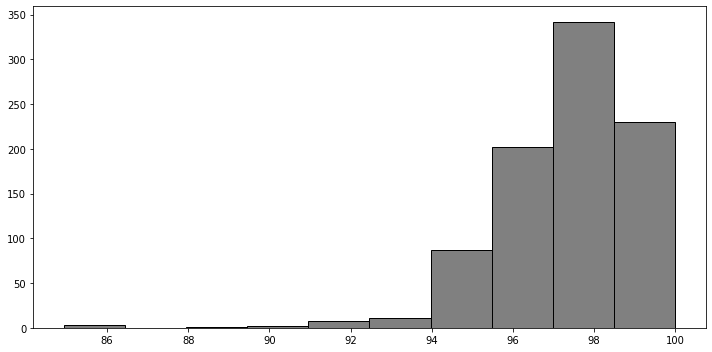

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_wd_AMAPÁ.jpeg
mean 97.30011657581728
median 97.53424657534246
mode 96.71232876712328
       Code  Year    Outlier  State
0  00051001  1968  97.540984  AMAPÁ
1  00051001  1969  97.260274  AMAPÁ
2  00051001  1970  98.356164  AMAPÁ
3  00051001  1971  98.356164  AMAPÁ
4  00051001  1972  98.907104  AMAPÁ
5  00051001  1973  95.616438  AMAPÁ
6  00051001  1974  95.068493  AMAPÁ
7  00051001  1975  96.712329  AMAPÁ
8  00051001  1976  98.087432  AMAPÁ
9  00051001  1977  97.534247  AMAPÁ


In [27]:
# calculateP("AMAPÁ")

PARÁ
1 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 285
17 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 285
21 / 285

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month



22 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 285
34 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 285
39 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 285
41 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 285
47 / 285
48 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 285
51 / 285
52 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 285
58 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 285
69 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 285
71 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 285
80 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 285
82 / 285
83 / 285

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 285
98 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 285
104 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 285
114 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 285
117 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 285
127 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 285
141 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 285
148 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 285
150 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 285
172 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 285
174 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 285
177 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 285
180 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 285
182 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 285
185 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 285
187 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 285
190 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 285
196 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 285
202 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 285
206 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 285
218 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 285
225 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 285
231 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 285
236 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 285
243 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 285
245 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 285
250 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 285
254 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 285
261 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 285
264 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 285
266 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 285
279 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 285
281 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 285
284 / 285


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


285 / 285


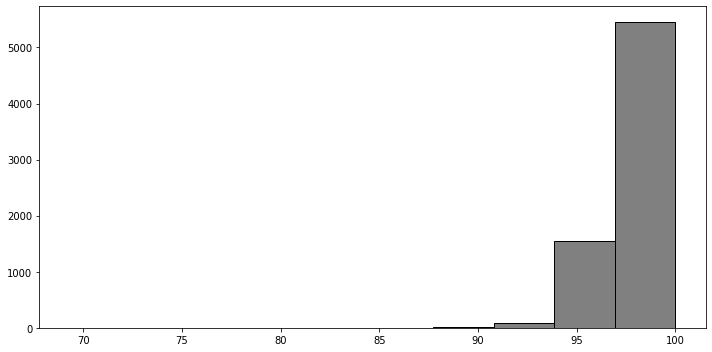

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_PARÁ.jpeg
mean 97.72515029418116
median 97.81420765027322
mode 98.08219178082192
       Code  Year     Outlier State
0  00047000  1958   99.178082  PARÁ
1  00047000  1959   96.712329  PARÁ
2  00047000  1960   95.628415  PARÁ
3  00047000  1961   98.904110  PARÁ
4  00047000  1962   99.452055  PARÁ
5  00047000  1963  100.000000  PARÁ
6  00047000  1964   99.726776  PARÁ
7  00047002  1977   99.452055  PARÁ
8  00047002  1978   96.164384  PARÁ
9  00047002  1979   96.986301  PARÁ
AMAPÁ
1 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 38
4 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 38
7 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 38
11 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

12 / 38
13 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 38
15 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

16 / 38
17 / 38
18 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 38
20 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 38
23 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

26 / 38
27 / 38
28 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 38
31 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 38
33 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

35 / 38
36 / 38
37 / 38


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


38 / 38


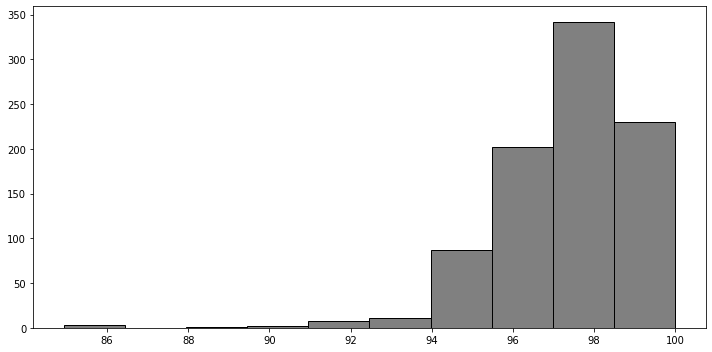

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_AMAPÁ.jpeg
mean 97.30011657581728
median 97.53424657534246
mode 96.71232876712328
       Code  Year    Outlier  State
0  00051001  1968  97.540984  AMAPÁ
1  00051001  1969  97.260274  AMAPÁ
2  00051001  1970  98.356164  AMAPÁ
3  00051001  1971  98.356164  AMAPÁ
4  00051001  1972  98.907104  AMAPÁ
5  00051001  1973  95.616438  AMAPÁ
6  00051001  1974  95.068493  AMAPÁ
7  00051001  1975  96.712329  AMAPÁ
8  00051001  1976  98.087432  AMAPÁ
9  00051001  1977  97.534247  AMAPÁ
RORAIMA
1 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 55
6 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 55
11 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 55
14 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 55
22 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 55
25 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 55
30 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

33 / 55
34 / 55
35 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 55
37 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 55
39 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 55
44 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 55
47 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 55
49 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 55
51 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 55
53 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 55
55 / 55


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


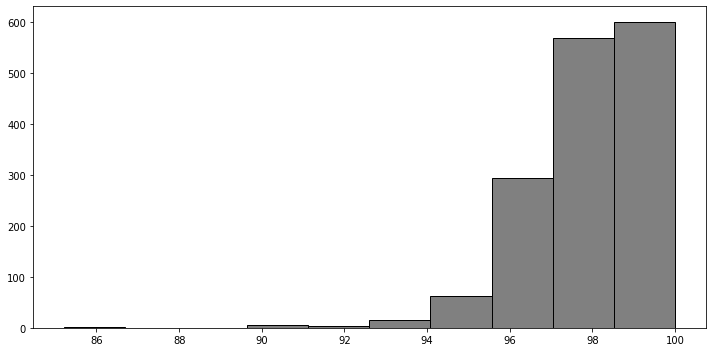

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_RORAIMA.jpeg
mean 97.92648763533299
median 98.08219178082192
mode 98.35616438356165
       Code  Year    Outlier    State
0  00060000  1977  99.178082  RORAIMA
1  00060000  1978  96.712329  RORAIMA
2  00060000  1979  96.438356  RORAIMA
3  00060000  1980  99.180328  RORAIMA
4  00060000  1982  98.082192  RORAIMA
5  00060000  1991  99.726027  RORAIMA
6  00060000  1992  99.726776  RORAIMA
7  00060000  1993  98.082192  RORAIMA
8  00060000  1994  96.438356  RORAIMA
9  00060000  1995  96.438356  RORAIMA
AMAZONAS
1 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 268
4 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 268
7 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 268
13 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 268
19 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 268
26 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 268
28 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 268
31 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 268
34 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 268
36 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 268
54 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 268
60 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 268
70 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 268
79 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 268
87 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 268
89 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 268
93 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 268
96 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 268
99 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 268
103 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 268
107 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 268
112 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 268
126 / 268
127 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

128 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 268
130 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 268
132 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 268
134 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 268
144 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 268
148 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 268
154 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 268
158 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 268
165 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 268
173 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 268
178 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 268
185 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 268
189 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 268
193 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 268
196 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 268
200 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 268
205 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 268
210 / 268
211 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

212 / 268
213 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 268
219 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 268
221 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 268
227 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 268
231 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 268
234 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 268
236 / 268
237 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 268
247 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 268
257 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 268
265 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 268
268 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


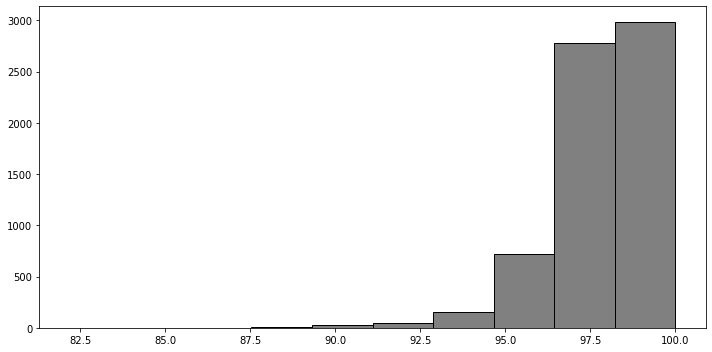

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_AMAZONAS.jpeg
mean 97.80212020803019
median 98.08219178082192
mode 98.08219178082192
       Code  Year    Outlier     State
0  00062000  1961  98.082192  AMAZONAS
1  00062000  1962  97.534247  AMAZONAS
2  00062000  1963  99.726027  AMAZONAS
3  00062000  1964  98.907104  AMAZONAS
4  00062000  1965  98.630137  AMAZONAS
5  00062000  1966  97.534247  AMAZONAS
6  00062000  1967  97.534247  AMAZONAS
7  00062000  1968  96.994536  AMAZONAS
8  00062000  1969  97.260274  AMAZONAS
9  00062000  1970  97.260274  AMAZONAS
MARANHÃO
1 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

2 / 241
3 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 241
45 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 241
49 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 241
60 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 241
63 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 241
72 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 241
83 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 241
187 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 241


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


241 / 241


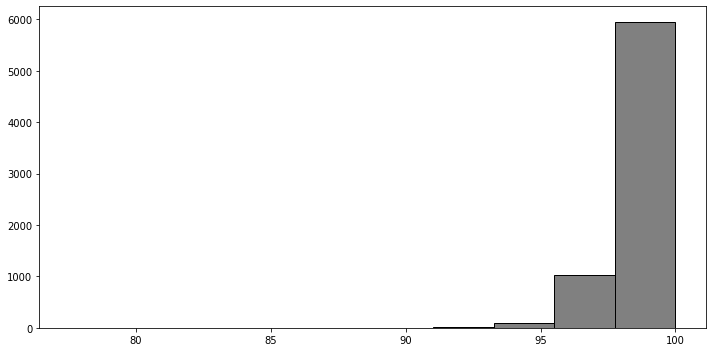

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_MARANHÃO.jpeg
mean 98.59721433952475
median 98.9041095890411
mode 100.0
       Code  Year     Outlier     State
0  00144000  1965  100.000000  MARANHÃO
1  00144000  1966   95.342466  MARANHÃO
2  00144000  1967   93.424658  MARANHÃO
3  00144000  1968   98.360656  MARANHÃO
4  00144000  1969   99.452055  MARANHÃO
5  00144000  1970   95.890411  MARANHÃO
6  00144000  1971  100.000000  MARANHÃO
7  00144000  1972   99.180328  MARANHÃO
8  00144000  1973   99.726027  MARANHÃO
9  00144000  1974   99.726027  MARANHÃO
CEARÁ
1 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


540 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


541 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


542 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


543 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


544 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


545 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


546 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


547 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


548 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


549 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


550 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


551 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


552 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


553 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


554 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


555 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


556 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


557 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


558 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


559 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


560 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


561 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


562 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


563 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


564 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


565 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


566 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


567 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


568 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


569 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


570 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


571 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


572 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


573 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


574 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


575 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


576 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


577 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


578 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


579 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


580 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


581 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


582 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


583 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


584 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


585 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


586 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


587 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


588 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


589 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


590 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


591 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


592 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


593 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


594 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


595 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


596 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


597 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


598 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


599 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


600 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


601 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


602 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


603 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


604 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


605 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


606 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


607 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


608 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


609 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


610 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


611 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


612 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


613 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


614 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


615 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


616 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


617 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


618 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


619 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


620 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


621 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


622 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


623 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


624 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


625 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


626 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


627 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


628 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


629 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


630 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


631 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


632 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


633 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


634 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


635 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


636 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


637 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


638 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


639 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


640 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


641 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


642 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


643 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


644 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


645 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


646 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


647 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


648 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


649 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


650 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


651 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


652 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


653 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


654 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


655 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


656 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


657 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


658 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


659 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


660 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


661 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


662 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


663 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


664 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


665 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


666 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


667 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


668 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


669 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


670 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


671 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


672 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


673 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


674 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


675 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


676 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


677 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


678 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


679 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


680 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


681 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


682 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


683 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


684 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


685 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


686 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


687 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


688 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


689 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


690 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


691 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


692 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


693 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


694 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


695 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


696 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


697 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


698 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


699 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


700 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


701 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


702 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


703 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


704 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


705 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


706 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


707 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


708 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


709 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


710 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


711 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


712 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


713 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


714 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


715 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


716 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


717 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


718 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


719 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


720 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


721 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


722 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


723 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


724 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


725 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


726 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


727 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


728 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


729 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


730 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


731 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


732 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


733 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


734 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


735 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


736 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


737 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


738 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


739 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


740 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


741 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


742 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


743 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


744 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


745 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


746 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


747 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


748 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


749 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


750 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


751 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


752 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


753 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


754 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


755 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


756 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


757 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


758 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


759 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


760 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


761 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


762 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


763 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


764 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


765 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


766 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


767 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


768 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


769 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


770 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


771 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


772 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


773 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


774 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


775 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


776 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


777 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


778 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


779 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


780 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


781 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


782 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


783 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


784 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


785 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


786 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


787 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


788 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


789 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


790 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


791 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


792 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


793 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


794 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


795 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


796 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


797 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


798 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


799 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


800 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


801 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


802 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


803 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


804 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


805 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


806 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


807 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


808 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


809 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


810 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


811 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


812 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


813 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


814 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


815 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


816 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


817 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


818 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


819 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


820 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


821 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


822 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


823 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


824 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


825 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


826 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


827 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


828 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


829 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


830 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


831 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


832 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


833 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


834 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


835 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


836 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


837 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


838 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


839 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


840 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


841 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


842 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


843 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


844 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


845 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


846 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


847 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


848 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


849 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


850 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


851 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


852 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


853 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


854 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


855 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


856 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


857 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


858 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


859 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


860 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


861 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


862 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


863 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


864 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


865 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


866 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


867 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


868 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


869 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


870 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


871 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


872 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


873 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


874 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


875 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


876 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


877 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


878 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


879 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


880 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


881 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


882 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


883 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


884 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


885 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


886 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


887 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


888 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


889 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


890 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


891 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


892 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


893 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


894 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


895 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


896 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


897 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


898 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


899 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


900 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


901 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


902 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


903 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


904 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


905 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


906 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


907 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


908 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


909 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


910 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


911 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


912 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


913 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


914 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


915 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


916 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


917 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


918 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


919 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


920 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


921 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


922 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


923 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


924 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


925 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


926 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


927 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


928 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


929 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


930 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


931 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


932 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


933 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


934 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


935 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


936 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


937 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


938 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


939 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


940 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


941 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


942 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


943 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


944 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


945 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


946 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


947 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


948 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


949 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


950 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


951 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


952 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


953 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


954 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


955 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


956 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


957 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


958 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


959 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


960 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


961 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


962 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


963 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


964 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


965 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


966 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


967 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


968 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


969 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


970 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


971 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


972 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


973 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


974 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


975 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


976 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


977 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


978 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


979 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


980 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


981 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


982 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


983 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


984 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


985 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


986 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


987 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


988 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


989 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


990 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


991 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


992 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


993 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


994 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


995 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


996 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


997 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


998 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


999 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1000 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1001 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1002 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1003 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1004 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1005 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1006 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1007 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1008 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1009 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1010 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1011 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1012 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1013 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1014 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1015 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1016 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1017 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1018 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1019 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1020 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1021 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1022 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1023 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1024 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1025 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1026 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1027 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1028 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1029 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1030 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1031 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1032 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1033 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1034 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1035 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1036 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1037 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1038 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1039 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1040 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1041 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1042 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1043 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1044 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1045 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1046 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1047 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1048 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1049 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1050 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1051 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1052 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1053 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1054 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1055 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1056 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1057 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1058 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1059 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1060 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1061 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1062 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1063 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1064 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1065 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1066 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1067 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1068 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1069 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1070 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1071 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1072 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1073 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1074 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1075 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1076 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1077 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1078 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1079 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1080 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1081 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1082 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1083 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1084 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1085 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1086 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1087 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1088 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1089 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1090 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1091 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1092 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1093 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1094 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1095 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1096 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1097 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1098 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1099 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1100 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1101 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1102 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1103 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1104 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1105 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1106 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1107 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1108 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1109 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1110 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1111 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1112 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1113 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1114 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1115 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1116 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1117 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1118 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1119 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1120 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1121 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1122 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1123 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1124 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1125 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1126 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1127 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1128 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1129 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1130 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1131 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1132 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1133 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1134 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1135 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1136 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1137 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1138 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1139 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1140 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1141 / 1142


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


1142 / 1142


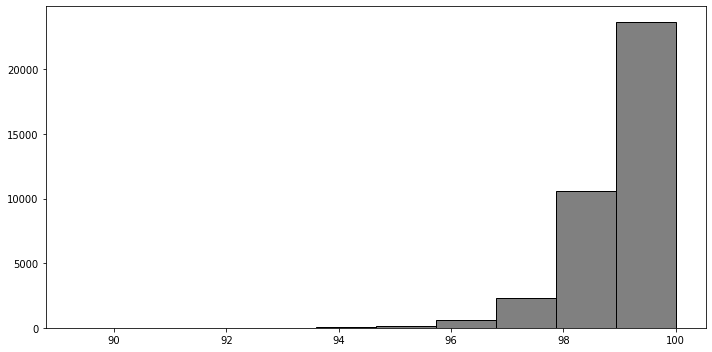

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_CEARÁ.jpeg
mean 99.11196154494493
median 99.18032786885246
mode 100.0
       Code  Year     Outlier  State
0  00239001  1988  100.000000  CEARÁ
1  00239001  1989   98.082192  CEARÁ
2  00239001  1990   98.356164  CEARÁ
3  00239001  1991   98.630137  CEARÁ
4  00239001  1992   99.453552  CEARÁ
5  00239001  1993   99.726027  CEARÁ
6  00239001  1994   98.356164  CEARÁ
7  00239001  1995   98.356164  CEARÁ
8  00239001  1996   97.267760  CEARÁ
9  00239001  1997   99.452055  CEARÁ
PIAUÍ
1 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 321
58 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 321
100 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 321
135 / 321
136 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 321
156 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 321
173 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 321
175 / 321
176 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 321
177 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 321
192 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 321
194 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 321
217 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 321
229 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 321
232 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 321
234 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 321
280 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 321


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


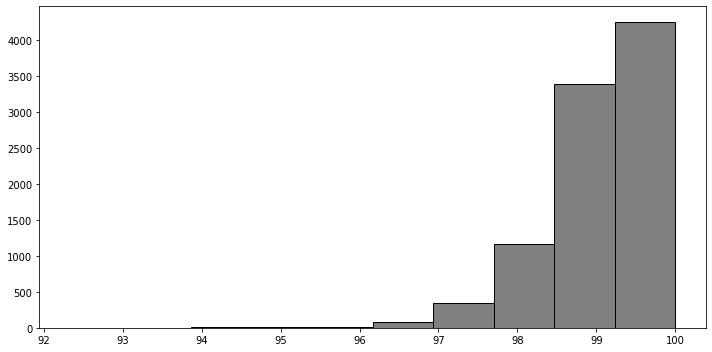

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_PIAUÍ.jpeg
mean 99.09643118658043
median 99.17808219178082
mode 100.0
       Code  Year     Outlier  State
0  00241000  1912  100.000000  PIAUÍ
1  00241000  1913   99.178082  PIAUÍ
2  00241000  1914   99.726027  PIAUÍ
3  00241000  1915  100.000000  PIAUÍ
4  00241000  1916   99.453552  PIAUÍ
5  00241000  1917   98.904110  PIAUÍ
6  00241000  1918   99.178082  PIAUÍ
7  00241000  1919   99.452055  PIAUÍ
8  00241000  1920   98.907104  PIAUÍ
9  00241000  1921   99.178082  PIAUÍ
PERNAMBUCO
1 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 374


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


374 / 374


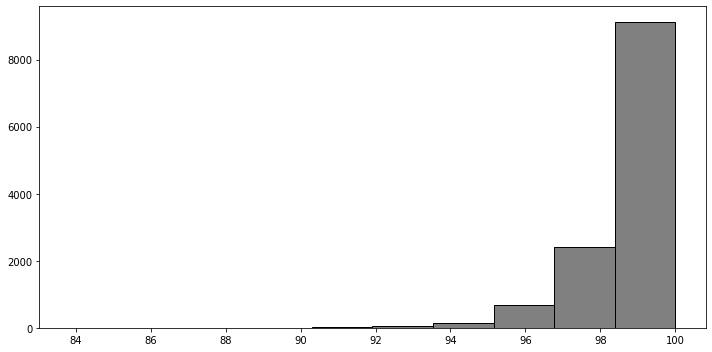

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_PERNAMBUCO.jpeg
mean 98.8442938204819
median 99.17808219178082
mode 100.0
       Code  Year     Outlier       State
0  00332000  1925   97.808219  PERNAMBUCO
1  00332000  1926   95.342466  PERNAMBUCO
2  00332000  1927   97.534247  PERNAMBUCO
3  00332000  1928  100.000000  PERNAMBUCO
4  00332000  1929   95.342466  PERNAMBUCO
5  00332000  1930   99.726027  PERNAMBUCO
6  00332000  1931   97.260274  PERNAMBUCO
7  00332000  1932   99.453552  PERNAMBUCO
8  00332000  1933   93.698630  PERNAMBUCO
9  00332000  1934   95.342466  PERNAMBUCO
RIO GRANDE DO NORTE
1 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 169
55 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 169
94 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 169
97 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 169
110 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 169
140 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 169


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


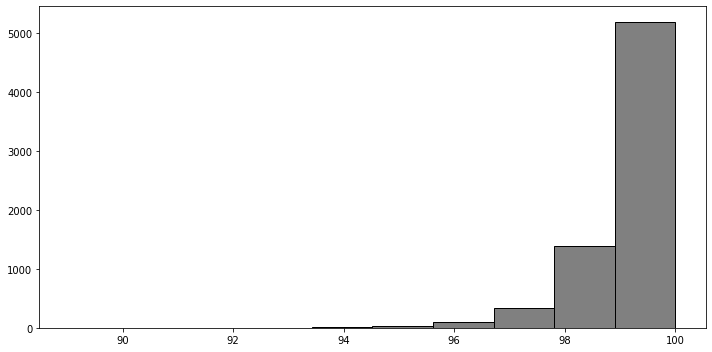

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_RIO GRANDE DO NORTE.jpeg
mean 99.07465140658654
median 99.18032786885246
mode 100.0
       Code  Year     Outlier                State
0  00437012  1911  100.000000  RIO GRANDE DO NORTE
1  00437012  1912   99.180328  RIO GRANDE DO NORTE
2  00437012  1913   99.452055  RIO GRANDE DO NORTE
3  00437012  1914   99.452055  RIO GRANDE DO NORTE
4  00437012  1915  100.000000  RIO GRANDE DO NORTE
5  00437012  1916   99.726776  RIO GRANDE DO NORTE
6  00437012  1917   97.808219  RIO GRANDE DO NORTE
7  00437012  1918  100.000000  RIO GRANDE DO NORTE
8  00437012  1919  100.000000  RIO GRANDE DO NORTE
9  00437012  1920   99.726776  RIO GRANDE DO NORTE
TOCANTINS
1 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

2 / 95
3 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 95
20 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 95
23 / 95
24 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 95
28 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 95
34 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 95
37 / 95
38 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 95
44 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 95
56 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 95
59 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 95
62 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 95
73 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 95
77 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 95
80 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 95
85 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 95
89 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 95


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


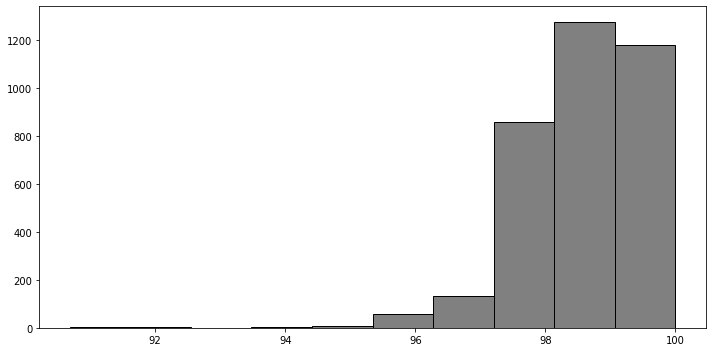

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_TOCANTINS.jpeg
mean 98.5751123689171
median 98.63013698630137
mode 98.9041095890411
       Code  Year     Outlier      State
0  00547002  1969   99.726027  TOCANTINS
1  00547002  1970   98.082192  TOCANTINS
2  00547002  1971   99.452055  TOCANTINS
3  00547002  1972  100.000000  TOCANTINS
4  00547002  1973   97.260274  TOCANTINS
5  00547002  1974   97.808219  TOCANTINS
6  00547002  1975   96.986301  TOCANTINS
7  00547002  1976   97.267760  TOCANTINS
8  00547002  1977   97.808219  TOCANTINS
9  00547002  1978   98.630137  TOCANTINS
PARAÍBA
1 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 338


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


338 / 338


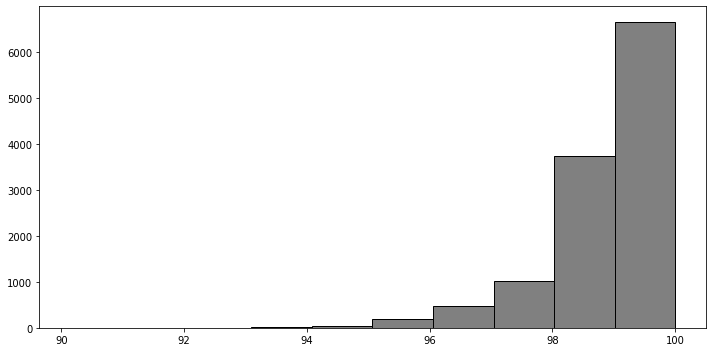

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_PARAÍBA.jpeg
mean 98.89169792803304
median 99.17808219178082
mode 100.0
       Code  Year     Outlier    State
0  00634000  1995   98.082192  PARAÍBA
1  00634000  1996   96.448087  PARAÍBA
2  00634000  1997  100.000000  PARAÍBA
3  00634000  1998   98.082192  PARAÍBA
4  00634000  1999   98.082192  PARAÍBA
5  00634000  2000   93.989071  PARAÍBA
6  00634000  2001   98.082192  PARAÍBA
7  00634000  2002   96.712329  PARAÍBA
8  00634000  2003   95.342466  PARAÍBA
9  00634000  2004   94.535519  PARAÍBA
ACRE
1 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 50
4 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

5 / 50
6 / 50
7 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 50
10 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 50
12 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 50
16 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 50
18 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 50
21 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 50
23 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

24 / 50
25 / 50
26 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

28 / 50
29 / 50
30 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

32 / 50
33 / 50
34 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

35 / 50
36 / 50
37 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 50
39 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

42 / 50
43 / 50
44 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

45 / 50
46 / 50
47 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

48 / 50
49 / 50
50 / 50


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


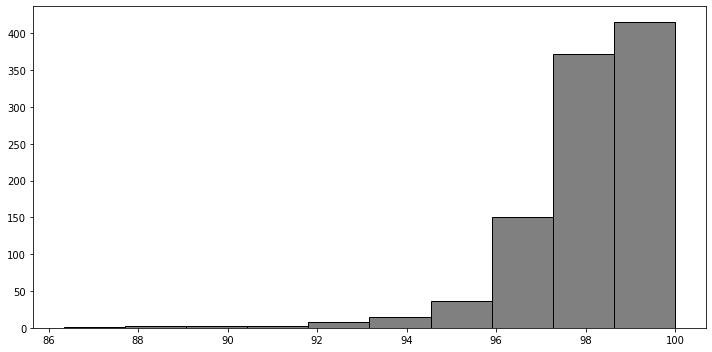

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_ACRE.jpeg
mean 98.16837309017629
median 98.36065573770492
mode 98.35616438356165
       Code  Year     Outlier State
0  00771001  1982   99.452055  ACRE
1  00771001  1983   98.630137  ACRE
2  00771001  1984   98.633880  ACRE
3  00771001  1985  100.000000  ACRE
4  00771001  1986   99.452055  ACRE
5  00771001  1987   97.534247  ACRE
6  00771001  1988   97.814208  ACRE
7  00771001  1989   98.904110  ACRE
8  00771001  1990   99.452055  ACRE
9  00771001  1991   99.452055  ACRE
ALAGOAS
1 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 117
10 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 117
25 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 117
35 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 117
41 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 117
46 / 117
47 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 117
64 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 117
66 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 117
69 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 117
73 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 117
79 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 117
92 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 117
101 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 117
112 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 117
114 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 117
116 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 117


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


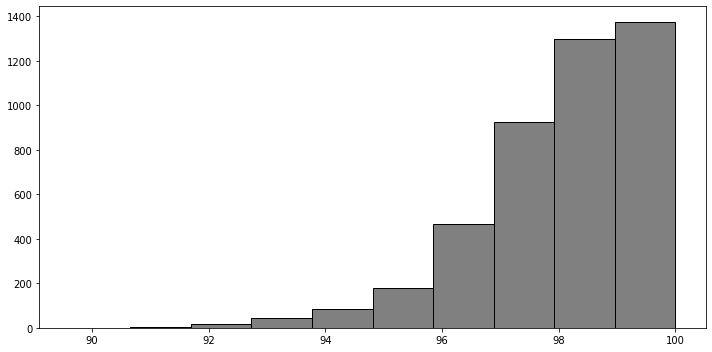

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_ALAGOAS.jpeg
mean 98.11276517958902
median 98.35616438356165
mode 100.0
       Code  Year     Outlier    State
0  00835072  1937   98.082192  ALAGOAS
1  00835072  1938   96.712329  ALAGOAS
2  00835072  1943  100.000000  ALAGOAS
3  00835072  1944   95.628415  ALAGOAS
4  00835072  1945   99.726027  ALAGOAS
5  00835072  1946  100.000000  ALAGOAS
6  00835072  1947  100.000000  ALAGOAS
7  00835072  1948  100.000000  ALAGOAS
8  00835072  1949  100.000000  ALAGOAS
9  00835072  1950   99.726027  ALAGOAS
BAHIA
1 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


540 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


541 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


542 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


543 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


544 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


545 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


546 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


547 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


548 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


549 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


550 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


551 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


552 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


553 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


554 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


555 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


556 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


557 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


558 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


559 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


560 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


561 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


562 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


563 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


564 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


565 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


566 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


567 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


568 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


569 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


570 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


571 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


572 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


573 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


574 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


575 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


576 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


577 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


578 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


579 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


580 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


581 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


582 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


583 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


584 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


585 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


586 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


587 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


588 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


589 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


590 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


591 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


592 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


593 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


594 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


595 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


596 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


597 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


598 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


599 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


600 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


601 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


602 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


603 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


604 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


605 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


606 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


607 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


608 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


609 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


610 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


611 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


612 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


613 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


614 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


615 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


616 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


617 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


618 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


619 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


620 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


621 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


622 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


623 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


624 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


625 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


626 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


627 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


628 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


629 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


630 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


631 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


632 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


633 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


634 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


635 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


636 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


637 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


638 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


639 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


640 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


641 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


642 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


643 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


644 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


645 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


646 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


647 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


648 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


649 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


650 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


651 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


652 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


653 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


654 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


655 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


656 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


657 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


658 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


659 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


660 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


661 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


662 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


663 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


664 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


665 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


666 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


667 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


668 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


669 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


670 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


671 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


672 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


673 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


674 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


675 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


676 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


677 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


678 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


679 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


680 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


681 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


682 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


683 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


684 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


685 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


686 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


687 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


688 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


689 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


690 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


691 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


692 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


693 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


694 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


695 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


696 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


697 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


698 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


699 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


700 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


701 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


702 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


703 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


704 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


705 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


706 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


707 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


708 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


709 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


710 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


711 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


712 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


713 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


714 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


715 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


716 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


717 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


718 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


719 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


720 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


721 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


722 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


723 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


724 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


725 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


726 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


727 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


728 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


729 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


730 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


731 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


732 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


733 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


734 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


735 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


736 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


737 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


738 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


739 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


740 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


741 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


742 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


743 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


744 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


745 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


746 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


747 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


748 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


749 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


750 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


751 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


752 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


753 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


754 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


755 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


756 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


757 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


758 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


759 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


760 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


761 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


762 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


763 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


764 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


765 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


766 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


767 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


768 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


769 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


770 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


771 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


772 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


773 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


774 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


775 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


776 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


777 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


778 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


779 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


780 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


781 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


782 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


783 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


784 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


785 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


786 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


787 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


788 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


789 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


790 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


791 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


792 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


793 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


794 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


795 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


796 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


797 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


798 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


799 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


800 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


801 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


802 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


803 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


804 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


805 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


806 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


807 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


808 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


809 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


810 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


811 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


812 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


813 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


814 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


815 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


816 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


817 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


818 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


819 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


820 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


821 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


822 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


823 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


824 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


825 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


826 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


827 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


828 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


829 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


830 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


831 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


832 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


833 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


834 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


835 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


836 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


837 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


838 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


839 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


840 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


841 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


842 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


843 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


844 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


845 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


846 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


847 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


848 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


849 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


850 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


851 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


852 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


853 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


854 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


855 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


856 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


857 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


858 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


859 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


860 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


861 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


862 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


863 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


864 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


865 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


866 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


867 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


868 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


869 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


870 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


871 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


872 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


873 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


874 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


875 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


876 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


877 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


878 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


879 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


880 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


881 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


882 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


883 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


884 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


885 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


886 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


887 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


888 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


889 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


890 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


891 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


892 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


893 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


894 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


895 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


896 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


897 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


898 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


899 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


900 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


901 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


902 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


903 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


904 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


905 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


906 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


907 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


908 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


909 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


910 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


911 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


912 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


913 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


914 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


915 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


916 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


917 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


918 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


919 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


920 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


921 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


922 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


923 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


924 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


925 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


926 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


927 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


928 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


929 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


930 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


931 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


932 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


933 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


934 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


935 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


936 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


937 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


938 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


939 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


940 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


941 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


942 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


943 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


944 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


945 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


946 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


947 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


948 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


949 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


950 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


951 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


952 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


953 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


954 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


955 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


956 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


957 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


958 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


959 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


960 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


961 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


962 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


963 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


964 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


965 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


966 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


967 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


968 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


969 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


970 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


971 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


972 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


973 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


974 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


975 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


976 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


977 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


978 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


979 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


980 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


981 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


982 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


983 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


984 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


985 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


986 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


987 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


988 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


989 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


990 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


991 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


992 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


993 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


994 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


995 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


996 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


997 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


998 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


999 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1000 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1001 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1002 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1003 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1004 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1005 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1006 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1007 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1008 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1009 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1010 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1011 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1012 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1013 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1014 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1015 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1016 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1017 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1018 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1019 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1020 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1021 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1022 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1023 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1024 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1025 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1026 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1027 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1028 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1029 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1030 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1031 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1032 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1033 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1034 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1035 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1036 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1037 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1038 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1039 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1040 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1041 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1042 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1043 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1044 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1045 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1046 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1047 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1048 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1049 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1050 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1051 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1052 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1053 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1054 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1055 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1056 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1057 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1058 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1059 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1060 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1061 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1062 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1063 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1064 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1065 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1066 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1067 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1068 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1069 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1070 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1071 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1072 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1073 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1074 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1075 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1076 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1077 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1078 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1079 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1080 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1081 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1082 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1083 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1084 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1085 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1086 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1087 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1088 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1089 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1090 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1091 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1092 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1093 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1094 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1095 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1096 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1097 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1098 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1099 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1100 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1101 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1102 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1103 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1104 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1105 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1106 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1107 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1108 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1109 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1110 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1111 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1112 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1113 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1114 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1115 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1116 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1117 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1118 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1119 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1120 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1121 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1122 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1123 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1124 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1125 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1126 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1127 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1128 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1129 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1130 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1131 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1132 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1133 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1134 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1135 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1136 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1137 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1138 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1139 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1140 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1141 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1142 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1143 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1144 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1145 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1146 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1147 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1148 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1149 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1150 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1151 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1152 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1153 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1154 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1155 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1156 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1157 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1158 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1159 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1160 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1161 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1162 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1163 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1164 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1165 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1166 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1167 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1168 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1169 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1170 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1171 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1172 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1173 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1174 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1175 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1176 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1177 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1178 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1179 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1180 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1181 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1182 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1183 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1184 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1185 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1186 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1187 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1188 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1189 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1190 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1191 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1192 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1193 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1194 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1195 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1196 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1197 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1198 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1199 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1200 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1201 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1202 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1203 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1204 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1205 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1206 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1207 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1208 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1209 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1210 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1211 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1212 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1213 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1214 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1215 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1216 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1217 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1218 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1219 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1220 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1221 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1222 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1223 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1224 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1225 / 1226


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


1226 / 1226


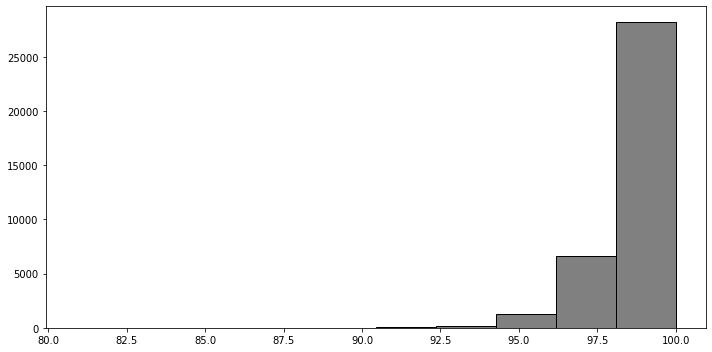

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_BAHIA.jpeg
mean 98.77460900141085
median 99.17808219178082
mode 100.0
       Code  Year     Outlier  State
0  00838029  1963  100.000000  BAHIA
1  00838029  1964   98.360656  BAHIA
2  00838029  1965   99.726027  BAHIA
3  00838029  1966   99.726027  BAHIA
4  00838029  1967   99.178082  BAHIA
5  00838029  1968   99.453552  BAHIA
6  00838029  1969   99.452055  BAHIA
7  00838029  1970   99.452055  BAHIA
8  00838029  1971   99.726027  BAHIA
9  00838029  1972   99.180328  BAHIA
MATO GROSSO
1 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 268
6 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 268
18 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 268
19 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 268
24 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 268
27 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 268
94 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 268
102 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 268
104 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 268
108 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 268
111 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 268
124 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 268
127 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 268
128 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 268
132 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 268
140 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 268
154 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 268
157 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 268
160 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 268
162 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 268
167 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 268
177 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 268
180 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 268
183 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 268
203 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 268
209 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 268
214 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 268
216 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 268
218 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 268
225 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 268
231 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 268
236 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 268
252 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 268
259 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 268
261 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


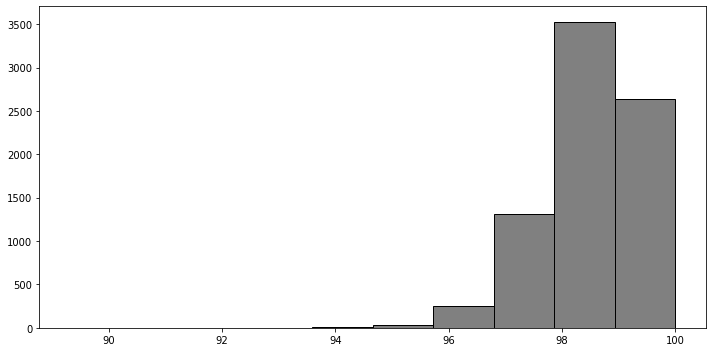

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_MATO GROSSO.jpeg
mean 98.59772795155105
median 98.63013698630137
mode 98.9041095890411
       Code  Year    Outlier        State
0  00857000  1982  99.178082  MATO GROSSO
1  00857000  1983  97.534247  MATO GROSSO
2  00857000  1984  98.360656  MATO GROSSO
3  00857000  1985  96.164384  MATO GROSSO
4  00857000  1986  98.630137  MATO GROSSO
5  00857000  1987  97.534247  MATO GROSSO
6  00857000  1988  97.540984  MATO GROSSO
7  00857000  1989  95.890411  MATO GROSSO
8  00857000  1990  98.082192  MATO GROSSO
9  00857000  1991  97.534247  MATO GROSSO
RONDÔNIA
1 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 84
4 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 84
6 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 84
8 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 84
10 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

11 / 84
12 / 84
13 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

16 / 84
17 / 84
18 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 84
20 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 84
24 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 84
26 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 84
28 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 84
30 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 84
32 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

34 / 84
35 / 84
36 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 84
38 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

42 / 84
43 / 84
44 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 84
49 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

51 / 84
52 / 84
53 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 84
55 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 84
57 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

62 / 84
63 / 84
64 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 84
66 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 84
69 / 84
70 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 84
72 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 84
74 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 84
77 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

78 / 84
79 / 84
80 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 84
84 / 84


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


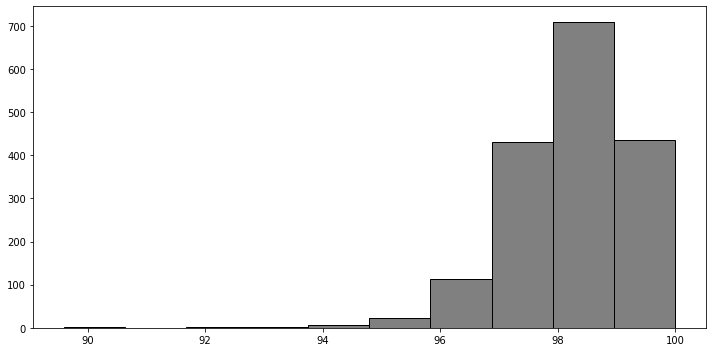

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_RONDÔNIA.jpeg
mean 98.27765670944461
median 98.35616438356165
mode 98.63013698630137
       Code  Year     Outlier     State
0  00862000  1977  100.000000  RONDÔNIA
1  00862000  1978   97.534247  RONDÔNIA
2  00862000  1979   94.246575  RONDÔNIA
3  00862000  1980   97.540984  RONDÔNIA
4  00862000  1981   97.260274  RONDÔNIA
5  00862000  1982   98.904110  RONDÔNIA
6  00862000  1983   99.452055  RONDÔNIA
7  00862000  1984   98.633880  RONDÔNIA
8  00862000  1985   98.630137  RONDÔNIA
9  00862000  1986   97.808219  RONDÔNIA
SERGIPE
1 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 102
12 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 102
19 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 102
22 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 102
25 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 102
29 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 102
36 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 102
46 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 102
48 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 102
71 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 102
75 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 102
93 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 102
98 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 102
101 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 102


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


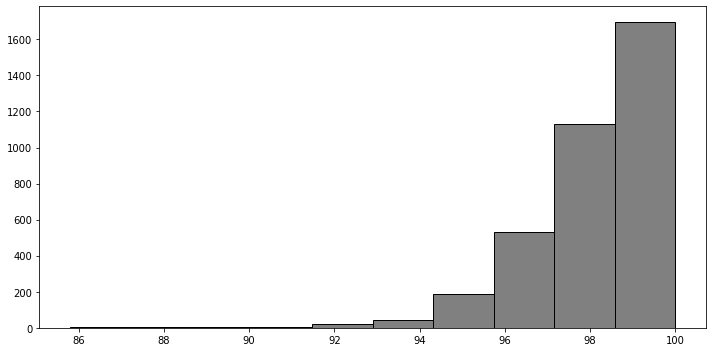

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_SERGIPE.jpeg
mean 98.11067997552986
median 98.35616438356165
mode 100.0
       Code  Year     Outlier    State
0  00937024  1963   99.726027  SERGIPE
1  00937024  1964   98.360656  SERGIPE
2  00937024  1965   99.178082  SERGIPE
3  00937024  1966   98.356164  SERGIPE
4  00937024  1967   98.082192  SERGIPE
5  00937024  1968   98.907104  SERGIPE
6  00937024  1969   98.356164  SERGIPE
7  00937024  1970  100.000000  SERGIPE
8  00937024  1971   99.178082  SERGIPE
9  00937024  1972  100.000000  SERGIPE
GOIÁS
1 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 236
38 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 236
46 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 236
59 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 236
73

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


 / 236
74 / 236
75 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 236
93 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 236
96 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 236
98 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 236
104 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 236
106 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 236
109 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 236
111 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 236
113 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 236
123 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 236
126 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 236
129 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 236
152 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 236
155 / 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236
156 / 236
157 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 236
163 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 236
171 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 236
175 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 236
178 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 236
179 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 236
202 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 236
207 / 236
208 

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


/ 236
209 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 236
214 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 236
219 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 236
233 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 236
235 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 236


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


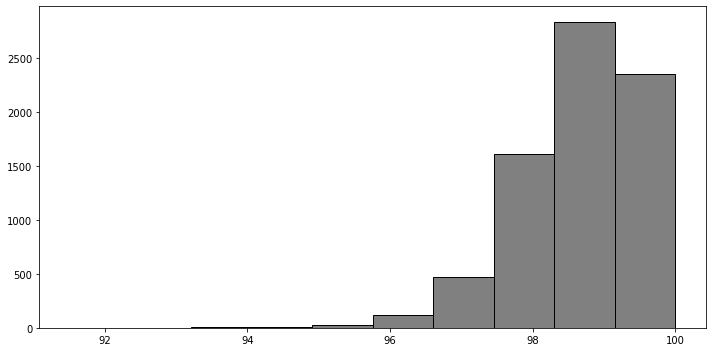

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_GOIÁS.jpeg
mean 98.57285463265171
median 98.63013698630137
mode 98.9041095890411
       Code  Year    Outlier  State
0  01250000  1973  99.178082  GOIÁS
1  01250000  1974  98.082192  GOIÁS
2  01250000  1975  99.178082  GOIÁS
3  01250000  1976  98.907104  GOIÁS
4  01250000  1977  98.082192  GOIÁS
5  01250000  1978  98.356164  GOIÁS
6  01250000  1979  98.356164  GOIÁS
7  01250000  1980  96.174863  GOIÁS
8  01250000  1981  99.452055  GOIÁS
9  01250000  1982  98.082192  GOIÁS
MINAS GERAIS
1 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


540 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


541 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


542 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


543 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


544 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


545 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


546 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


547 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


548 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


549 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


550 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


551 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


552 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


553 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


554 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


555 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


556 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


557 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


558 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


559 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


560 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


561 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


562 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


563 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


564 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


565 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


566 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


567 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


568 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


569 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


570 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


571 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


572 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


573 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


574 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


575 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


576 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


577 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


578 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


579 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


580 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


581 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


582 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


583 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


584 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


585 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


586 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


587 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


588 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


589 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


590 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


591 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


592 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


593 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


594 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


595 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


596 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


597 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


598 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


599 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


600 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


601 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


602 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


603 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


604 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


605 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


606 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


607 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


608 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


609 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


610 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


611 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


612 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


613 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


614 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


615 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


616 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


617 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


618 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


619 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


620 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


621 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


622 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


623 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


624 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


625 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


626 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


627 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


628 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


629 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


630 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


631 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


632 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


633 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


634 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


635 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


636 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


637 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


638 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


639 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


640 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


641 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


642 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


643 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


644 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


645 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


646 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


647 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


648 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


649 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


650 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


651 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


652 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


653 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


654 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


655 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


656 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


657 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


658 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


659 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


660 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


661 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


662 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


663 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


664 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


665 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


666 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


667 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


668 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


669 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


670 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


671 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


672 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


673 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


674 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


675 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


676 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


677 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


678 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


679 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


680 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


681 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


682 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


683 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


684 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


685 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


686 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


687 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


688 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


689 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


690 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


691 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


692 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


693 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


694 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


695 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


696 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


697 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


698 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


699 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


700 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


701 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


702 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


703 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


704 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


705 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


706 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


707 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


708 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


709 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


710 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


711 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


712 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


713 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


714 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


715 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


716 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


717 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


718 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


719 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


720 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


721 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


722 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


723 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


724 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


725 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


726 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


727 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


728 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


729 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


730 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


731 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


732 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


733 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


734 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


735 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


736 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


737 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


738 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


739 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


740 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


741 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


742 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


743 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


744 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


745 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


746 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


747 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


748 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


749 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


750 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


751 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


752 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


753 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


754 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


755 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


756 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


757 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


758 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


759 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


760 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


761 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


762 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


763 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


764 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


765 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


766 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


767 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


768 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


769 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


770 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


771 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


772 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


773 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


774 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


775 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


776 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


777 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


778 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


779 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


780 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


781 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


782 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


783 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


784 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


785 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


786 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


787 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


788 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


789 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


790 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


791 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


792 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


793 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


794 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


795 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


796 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


797 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


798 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


799 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


800 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


801 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


802 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


803 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


804 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


805 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


806 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


807 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


808 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


809 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


810 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


811 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


812 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


813 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


814 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


815 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


816 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


817 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


818 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


819 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


820 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


821 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


822 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


823 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


824 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


825 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


826 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


827 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


828 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


829 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


830 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


831 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


832 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


833 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


834 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


835 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


836 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


837 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


838 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


839 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


840 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


841 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


842 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


843 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


844 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


845 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


846 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


847 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


848 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


849 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


850 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


851 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


852 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


853 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


854 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


855 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


856 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


857 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


858 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


859 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


860 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


861 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


862 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


863 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


864 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


865 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


866 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


867 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


868 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


869 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


870 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


871 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


872 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


873 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


874 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


875 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


876 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


877 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


878 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


879 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


880 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


881 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


882 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


883 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


884 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


885 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


886 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


887 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


888 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


889 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


890 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


891 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


892 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


893 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


894 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


895 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


896 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


897 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


898 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


899 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


900 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


901 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


902 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


903 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


904 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


905 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


906 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


907 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


908 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


909 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


910 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


911 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


912 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


913 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


914 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


915 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


916 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


917 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


918 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


919 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


920 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


921 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


922 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


923 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


924 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


925 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


926 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


927 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


928 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


929 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


930 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


931 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


932 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


933 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


934 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


935 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


936 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


937 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


938 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


939 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


940 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


941 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


942 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


943 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


944 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


945 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


946 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


947 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


948 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


949 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


950 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


951 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


952 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


953 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


954 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


955 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


956 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


957 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


958 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


959 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


960 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


961 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


962 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


963 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


964 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


965 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


966 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


967 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


968 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


969 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


970 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


971 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


972 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


973 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


974 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


975 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


976 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


977 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


978 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


979 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


980 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


981 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


982 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


983 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


984 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


985 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


986 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


987 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


988 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


989 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


990 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


991 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


992 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


993 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


994 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


995 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


996 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


997 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


998 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


999 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1000 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1001 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1002 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1003 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1004 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1005 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1006 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1007 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1008 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1009 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1010 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1011 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1012 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1013 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1014 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1015 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1016 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1017 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1018 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1019 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1020 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1021 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1022 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1023 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1024 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1025 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1026 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1027 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1028 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1029 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1030 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1031 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1032 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1033 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1034 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1035 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1036 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1037 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1038 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1039 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1040 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1041 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1042 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1043 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1044 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1045 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1046 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1047 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1048 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1049 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1050 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1051 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1052 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1053 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1054 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1055 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1056 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1057 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1058 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1059 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1060 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1061 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1062 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1063 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1064 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1065 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1066 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1067 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1068 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1069 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1070 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1071 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1072 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1073 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1074 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1075 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1076 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1077 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1078 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1079 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1080 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1081 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1082 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1083 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1084 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1085 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1086 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1087 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1088 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1089 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1090 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1091 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1092 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1093 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1094 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1095 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1096 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1097 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1098 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1099 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1100 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1101 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1102 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1103 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1104 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1105 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1106 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1107 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1108 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1109 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1110 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1111 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1112 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1113 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1114 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1115 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1116 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1117 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1118 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1119 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1120 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1121 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1122 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1123 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1124 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1125 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1126 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1127 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1128 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1129 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1130 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1131 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1132 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1133 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1134 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1135 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1136 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1137 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1138 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1139 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1140 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1141 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1142 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1143 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1144 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1145 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1146 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1147 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1148 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1149 / 1150


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


1150 / 1150


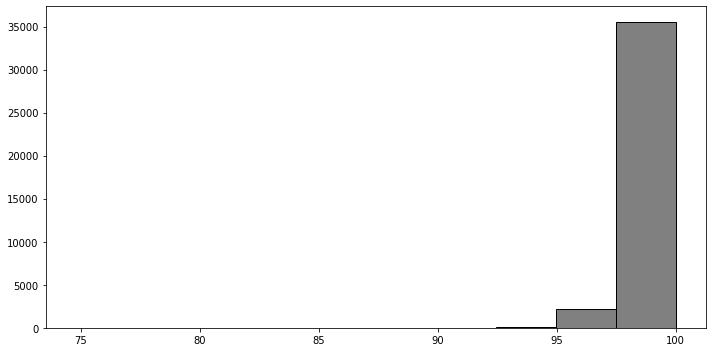

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_MINAS GERAIS.jpeg
mean 98.75534992885503
median 98.9041095890411
mode 98.9041095890411
       Code  Year     Outlier         State
0  01442019  1955   99.726027  MINAS GERAIS
1  01442019  1956  100.000000  MINAS GERAIS
2  01442019  1957   99.726027  MINAS GERAIS
3  01442019  1963   98.904110  MINAS GERAIS
4  01442019  1964   99.453552  MINAS GERAIS
5  01442019  1965   98.356164  MINAS GERAIS
6  01442019  1966   97.808219  MINAS GERAIS
7  01442019  1967   99.178082  MINAS GERAIS
8  01442019  1968   99.180328  MINAS GERAIS
9  01442019  1969   98.904110  MINAS GERAIS
DISTRITO FEDERAL
1 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 83
4 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 83
21 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 83
26 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 83
28 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 83
30 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 83
32 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 83
36 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

37 / 83
38 / 83
39 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 83
41 / 83
42 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

43 / 83
44 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

45 / 83
46 / 83
47 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 83
49 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 83
51 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 83
53 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 83
55 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 83
57 / 83
58 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 83
60 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

70 / 83
71 / 83
72 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 83
74 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 83
76 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 83
78 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 83
80 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 83
82 / 83


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


83 / 83


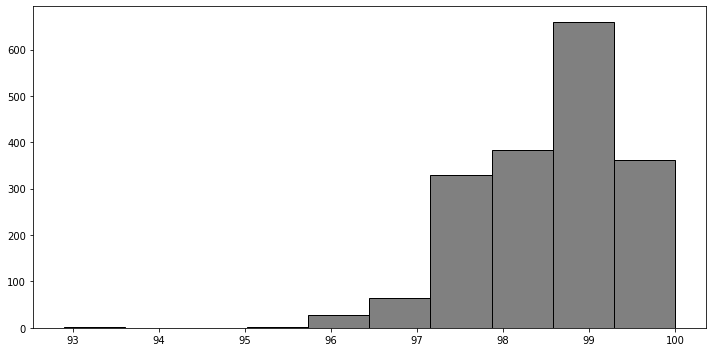

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_DISTRITO FEDERAL.jpeg
mean 98.55051168186144
median 98.63013698630137
mode 98.9041095890411
       Code  Year     Outlier             State
0  01547002  1973   99.178082  DISTRITO FEDERAL
1  01547002  1974   98.904110  DISTRITO FEDERAL
2  01547002  1975   99.726027  DISTRITO FEDERAL
3  01547002  1976   98.633880  DISTRITO FEDERAL
4  01547002  1977   97.534247  DISTRITO FEDERAL
5  01547002  1978  100.000000  DISTRITO FEDERAL
6  01547002  1979   98.082192  DISTRITO FEDERAL
7  01547002  1980   99.726776  DISTRITO FEDERAL
8  01547002  1981   99.726027  DISTRITO FEDERAL
9  01547002  1982   98.904110  DISTRITO FEDERAL
MATO GROSSO DO SUL
1 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 187
7 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 187
10 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 187
34 / 187
35 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 187
40 / 187
41 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 187
46 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 187
48 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 187
51 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 187
62 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 187
64 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 187
73 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 187
79 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 187
82 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 187
88 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 187
94 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 187
97 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 187
102 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 187
108 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 187
110 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 187
112 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 187
124 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 187
135 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 187
145 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 187
154 / 187
155 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 187


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


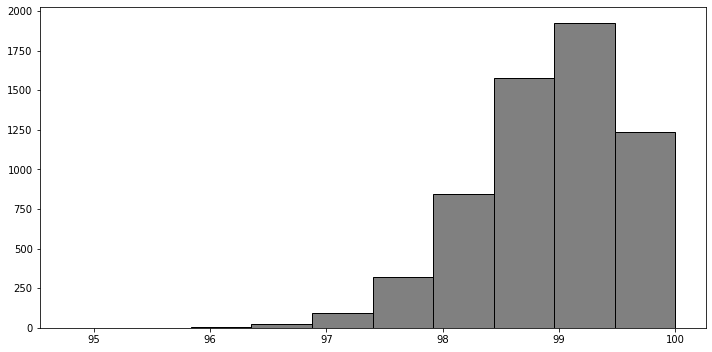

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_MATO GROSSO DO SUL.jpeg
mean 98.99401292895473
median 99.17808219178082
mode 99.17808219178082
       Code  Year     Outlier               State
0  01754002  1969   99.178082  MATO GROSSO DO SUL
1  01754002  1970   99.178082  MATO GROSSO DO SUL
2  01754002  1971   98.630137  MATO GROSSO DO SUL
3  01754002  1972   98.907104  MATO GROSSO DO SUL
4  01754002  1976   98.633880  MATO GROSSO DO SUL
5  01754002  1977   96.438356  MATO GROSSO DO SUL
6  01754002  1978   98.356164  MATO GROSSO DO SUL
7  01754002  1980  100.000000  MATO GROSSO DO SUL
8  01754002  1982   98.356164  MATO GROSSO DO SUL
9  01754002  1983   98.630137  MATO GROSSO DO SUL
ESPÍRITO SANTO
1 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 170
11 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 170
35 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 170
37 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 170
39 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 170
44 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 170
62 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 170
71 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 170
73 / 170
74 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

75 / 170
76 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 170
79 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 170
83 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 170
86 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 170
88 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 170
110 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 170
121 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 170
130 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 170
132 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 170
155 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 170


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


170 / 170


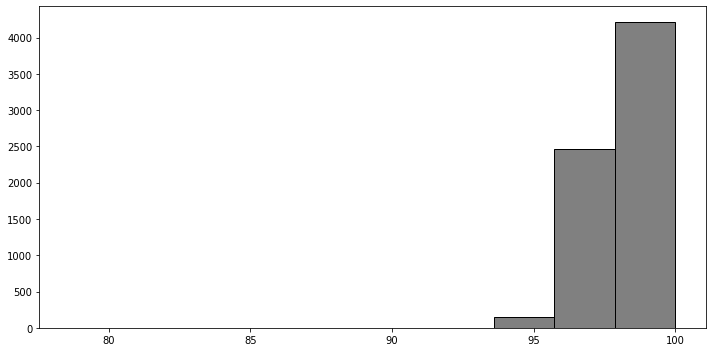

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_ESPÍRITO SANTO.jpeg
mean 98.14728926722465
median 98.35616438356165
mode 98.63013698630137
       Code  Year    Outlier           State
0  01839000  1951  97.534247  ESPÍRITO SANTO
1  01839000  1952  96.174863  ESPÍRITO SANTO
2  01839000  1953  98.630137  ESPÍRITO SANTO
3  01839000  1954  99.452055  ESPÍRITO SANTO
4  01839000  1955  98.904110  ESPÍRITO SANTO
5  01839000  1956  98.633880  ESPÍRITO SANTO
6  01839000  1957  98.356164  ESPÍRITO SANTO
7  01839000  1958  97.534247  ESPÍRITO SANTO
8  01839000  1959  98.356164  ESPÍRITO SANTO
9  01839000  1960  97.540984  ESPÍRITO SANTO
SÃO PAULO
1 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


540 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


541 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


542 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


543 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


544 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


545 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


546 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


547 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


548 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


549 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


550 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


551 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


552 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


553 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


554 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


555 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


556 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


557 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


558 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


559 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


560 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


561 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


562 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


563 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


564 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


565 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


566 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


567 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


568 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


569 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


570 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


571 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


572 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


573 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


574 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


575 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


576 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


577 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


578 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


579 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


580 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


581 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


582 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


583 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


584 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


585 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


586 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


587 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


588 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


589 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


590 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


591 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


592 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


593 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


594 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


595 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


596 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


597 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


598 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


599 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


600 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


601 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


602 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


603 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


604 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


605 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


606 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


607 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


608 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


609 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


610 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


611 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


612 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


613 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


614 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


615 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


616 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


617 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


618 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


619 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


620 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


621 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


622 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


623 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


624 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


625 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


626 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


627 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


628 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


629 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


630 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


631 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


632 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


633 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


634 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


635 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


636 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


637 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


638 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


639 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


640 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


641 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


642 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


643 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


644 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


645 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


646 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


647 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


648 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


649 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


650 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


651 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


652 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


653 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


654 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


655 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


656 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


657 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


658 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


659 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


660 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


661 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


662 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


663 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


664 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


665 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


666 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


667 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


668 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


669 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


670 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


671 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


672 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


673 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


674 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


675 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


676 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


677 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


678 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


679 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


680 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


681 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


682 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


683 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


684 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


685 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


686 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


687 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


688 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


689 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


690 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


691 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


692 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


693 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


694 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


695 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


696 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


697 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


698 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


699 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


700 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


701 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


702 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


703 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


704 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


705 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


706 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


707 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


708 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


709 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


710 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


711 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


712 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


713 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


714 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


715 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


716 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


717 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


718 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


719 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


720 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


721 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


722 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


723 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


724 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


725 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


726 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


727 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


728 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


729 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


730 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


731 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


732 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


733 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


734 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


735 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


736 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


737 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


738 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


739 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


740 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


741 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


742 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


743 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


744 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


745 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


746 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


747 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


748 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


749 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


750 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


751 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


752 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


753 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


754 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


755 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


756 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


757 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


758 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


759 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


760 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


761 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


762 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


763 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


764 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


765 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


766 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


767 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


768 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


769 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


770 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


771 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


772 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


773 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


774 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


775 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


776 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


777 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


778 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


779 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


780 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


781 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


782 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


783 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


784 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


785 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


786 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


787 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


788 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


789 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


790 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


791 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


792 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


793 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


794 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


795 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


796 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


797 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


798 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


799 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


800 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


801 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


802 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


803 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


804 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


805 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


806 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


807 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


808 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


809 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


810 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


811 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


812 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


813 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


814 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


815 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


816 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


817 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


818 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


819 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


820 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


821 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


822 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


823 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


824 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


825 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


826 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


827 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


828 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


829 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


830 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


831 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


832 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


833 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


834 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


835 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


836 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


837 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


838 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


839 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


840 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


841 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


842 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


843 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


844 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


845 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


846 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


847 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


848 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


849 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


850 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


851 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


852 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


853 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


854 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


855 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


856 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


857 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


858 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


859 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


860 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


861 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


862 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


863 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


864 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


865 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


866 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


867 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


868 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


869 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


870 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


871 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


872 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


873 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


874 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


875 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


876 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


877 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


878 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


879 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


880 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


881 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


882 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


883 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


884 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


885 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


886 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


887 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


888 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


889 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


890 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


891 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


892 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


893 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


894 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


895 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


896 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


897 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


898 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


899 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


900 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


901 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


902 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


903 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


904 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


905 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


906 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


907 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


908 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


909 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


910 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


911 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


912 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


913 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


914 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


915 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


916 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


917 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


918 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


919 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


920 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


921 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


922 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


923 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


924 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


925 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


926 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


927 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


928 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


929 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


930 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


931 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


932 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


933 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


934 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


935 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


936 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


937 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


938 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


939 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


940 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


941 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


942 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


943 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


944 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


945 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


946 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


947 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


948 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


949 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


950 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


951 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


952 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


953 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


954 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


955 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


956 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


957 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


958 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


959 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


960 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


961 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


962 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


963 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


964 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


965 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


966 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


967 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


968 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


969 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


970 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


971 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


972 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


973 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


974 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


975 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


976 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


977 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


978 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


979 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


980 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


981 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


982 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


983 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


984 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


985 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


986 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


987 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


988 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


989 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


990 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


991 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


992 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


993 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


994 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


995 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


996 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


997 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


998 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


999 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1000 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1001 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1002 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1003 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1004 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1005 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1006 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1007 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1008 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1009 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1010 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1011 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1012 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1013 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1014 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1015 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1016 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1017 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1018 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1019 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1020 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1021 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1022 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1023 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1024 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1025 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1026 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1027 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1028 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1029 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1030 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1031 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1032 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1033 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1034 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1035 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1036 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1037 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1038 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1039 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1040 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1041 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1042 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1043 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1044 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1045 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1046 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1047 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1048 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1049 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1050 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1051 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1052 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1053 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1054 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1055 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1056 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1057 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1058 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1059 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1060 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1061 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1062 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1063 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1064 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1065 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1066 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1067 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1068 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1069 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1070 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1071 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1072 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1073 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1074 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1075 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1076 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1077 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1078 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1079 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1080 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1081 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1082 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1083 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1084 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1085 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1086 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1087 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1088 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1089 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1090 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1091 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1092 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1093 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1094 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1095 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1096 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1097 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1098 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1099 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1100 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1101 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1102 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1103 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1104 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1105 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1106 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1107 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1108 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1109 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1110 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1111 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1112 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1113 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1114 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1115 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1116 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1117 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1118 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1119 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1120 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1121 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1122 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1123 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1124 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1125 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1126 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1127 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1128 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1129 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1130 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1131 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1132 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1133 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1134 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1135 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1136 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1137 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1138 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1139 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1140 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1141 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1142 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1143 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1144 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1145 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1146 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1147 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1148 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1149 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1150 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1151 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1152 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1153 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1154 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1155 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1156 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1157 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1158 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1159 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1160 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1161 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1162 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1163 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1164 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1165 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1166 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1167 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1168 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1169 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1170 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1171 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1172 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1173 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1174 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1175 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1176 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1177 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1178 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1179 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1180 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1181 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1182 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1183 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1184 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1185 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1186 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1187 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1188 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1189 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1190 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1191 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1192 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1193 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1194 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1195 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1196 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1197 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1198 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1199 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1200 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1201 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1202 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1203 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1204 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1205 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1206 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1207 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1208 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1209 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1210 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1211 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1212 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1213 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1214 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1215 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1216 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1217 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1218 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1219 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1220 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1221 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1222 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1223 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1224 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1225 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1226 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1227 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1228 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1229 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1230 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1231 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1232 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1233 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1234 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1235 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1236 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1237 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1238 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1239 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1240 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1241 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1242 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1243 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1244 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1245 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1246 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1247 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1248 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1249 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1250 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1251 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1252 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1253 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1254 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1255 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1256 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1257 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1258 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1259 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1260 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1261 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1262 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1263 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1264 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1265 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1266 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1267 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1268 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1269 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1270 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1271 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1272 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1273 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1274 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1275 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1276 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1277 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1278 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1279 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1280 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1281 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1282 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1283 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1284 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1285 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1286 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1287 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1288 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1289 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1290 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1291 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1292 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1293 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1294 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1295 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1296 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1297 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1298 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1299 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1300 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1301 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1302 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1303 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1304 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1305 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1306 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1307 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1308 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1309 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1310 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1311 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1312 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1313 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1314 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1315 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1316 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1317 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1318 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1319 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1320 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1321 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1322 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1323 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1324 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1325 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1326 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1327 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1328 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1329 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1330 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1331 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1332 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1333 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1334 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1335 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1336 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1337 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1338 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1339 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1340 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1341 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1342 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1343 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1344 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1345 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1346 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1347 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1348 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1349 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1350 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1351 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1352 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1353 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1354 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1355 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1356 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1357 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1358 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1359 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1360 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1361 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1362 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1363 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1364 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1365 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1366 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1367 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1368 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1369 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1370 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1371 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1372 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1373 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1374 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1375 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1376 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1377 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1378 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1379 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1380 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1381 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1382 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1383 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1384 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1385 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1386 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1387 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1388 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1389 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1390 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1391 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1392 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1393 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1394 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1395 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1396 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1397 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1398 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1399 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1400 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1401 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1402 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1403 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1404 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1405 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1406 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1407 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1408 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1409 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1410 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1411 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1412 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1413 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1414 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1415 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1416 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1417 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1418 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1419 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1420 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1421 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1422 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1423 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1424 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1425 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1426 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1427 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1428 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1429 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1430 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1431 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1432 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1433 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1434 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1435 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1436 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1437 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1438 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1439 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1440 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1441 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1442 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1443 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1444 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1445 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1446 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1447 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1448 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1449 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1450 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1451 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1452 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1453 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1454 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1455 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1456 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1457 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1458 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1459 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1460 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1461 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1462 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1463 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1464 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1465 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1466 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1467 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1468 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1469 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1470 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1471 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1472 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1473 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1474 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1475 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1476 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1477 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1478 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1479 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1480 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1481 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1482 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1483 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1484 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1485 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1486 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1487 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1488 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1489 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1490 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1491 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1492 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1493 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1494 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1495 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1496 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1497 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1498 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1499 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1500 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1501 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1502 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1503 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1504 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1505 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1506 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1507 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1508 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1509 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1510 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1511 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1512 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1513 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1514 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1515 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1516 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1517 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1518 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1519 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1520 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1521 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1522 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1523 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1524 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1525 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1526 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1527 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1528 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1529 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1530 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1531 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1532 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1533 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1534 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1535 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1536 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1537 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1538 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1539 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1540 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1541 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1542 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1543 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1544 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1545 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1546 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1547 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1548 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1549 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1550 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1551 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1552 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1553 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1554 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1555 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1556 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1557 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1558 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1559 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1560 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1561 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1562 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1563 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1564 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1565 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1566 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1567 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1568 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1569 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1570 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1571 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1572 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1573 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1574 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1575 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1576 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1577 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1578 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1579 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1580 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1581 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1582 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1583 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1584 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1585 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1586 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1587 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1588 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1589 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1590 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1591 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1592 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1593 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1594 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1595 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1596 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1597 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1598 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1599 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1600 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1601 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1602 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1603 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1604 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1605 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1606 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1607 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1608 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1609 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1610 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1611 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1612 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1613 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1614 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1615 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1616 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1617 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1618 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1619 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1620 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1621 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1622 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1623 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1624 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1625 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1626 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1627 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1628 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1629 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1630 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1631 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1632 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1633 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1634 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1635 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1636 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1637 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1638 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1639 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1640 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1641 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1642 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1643 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1644 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1645 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1646 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1647 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1648 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1649 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1650 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1651 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1652 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1653 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1654 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1655 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1656 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1657 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1658 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1659 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1660 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1661 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1662 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1663 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1664 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1665 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1666 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1667 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1668 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1669 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1670 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1671 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1672 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1673 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1674 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1675 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1676 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1677 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1678 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1679 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1680 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1681 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1682 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1683 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1684 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1685 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1686 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1687 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1688 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1689 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1690 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1691 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1692 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1693 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1694 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1695 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1696 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1697 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1698 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1699 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1700 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1701 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1702 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1703 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1704 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1705 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1706 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1707 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1708 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1709 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1710 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1711 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1712 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1713 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1714 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1715 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1716 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1717 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1718 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1719 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1720 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1721 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1722 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1723 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1724 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1725 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1726 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1727 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1728 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1729 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1730 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1731 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1732 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1733 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1734 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1735 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1736 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1737 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1738 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1739 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1740 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1741 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1742 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1743 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1744 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1745 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1746 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1747 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1748 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1749 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1750 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1751 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1752 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1753 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1754 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1755 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1756 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1757 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1758 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1759 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1760 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1761 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1762 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1763 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1764 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1765 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1766 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1767 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1768 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1769 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1770 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1771 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1772 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1773 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1774 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1775 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1776 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1777 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1778 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1779 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1780 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1781 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1782 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1783 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1784 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1785 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1786 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1787 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1788 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1789 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1790 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1791 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1792 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1793 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1794 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1795 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1796 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1797 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1798 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1799 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1800 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1801 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1802 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1803 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1804 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1805 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1806 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1807 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1808 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1809 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1810 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1811 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1812 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1813 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1814 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1815 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1816 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1817 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1818 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1819 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1820 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1821 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1822 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1823 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1824 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1825 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1826 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1827 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1828 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1829 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1830 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1831 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1832 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1833 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1834 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1835 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1836 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1837 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1838 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1839 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1840 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1841 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1842 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1843 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1844 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1845 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1846 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1847 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1848 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1849 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1850 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1851 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1852 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1853 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1854 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1855 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1856 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1857 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1858 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1859 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1860 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1861 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1862 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1863 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1864 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1865 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1866 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1867 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1868 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1869 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1870 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1871 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1872 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1873 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1874 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1875 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1876 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1877 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1878 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1879 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1880 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1881 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1882 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1883 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1884 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1885 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1886 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1887 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1888 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1889 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1890 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1891 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1892 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1893 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1894 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1895 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1896 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1897 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1898 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1899 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1900 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1901 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1902 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1903 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1904 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1905 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1906 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1907 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1908 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1909 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1910 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1911 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1912 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1913 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1914 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1915 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1916 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1917 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1918 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1919 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1920 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1921 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1922 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1923 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1924 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1925 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1926 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1927 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1928 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1929 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1930 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1931 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1932 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1933 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1934 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1935 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1936 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1937 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1938 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1939 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1940 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1941 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1942 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1943 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1944 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1945 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1946 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1947 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1948 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1949 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1950 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1951 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1952 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1953 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1954 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1955 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1956 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1957 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1958 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1959 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1960 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1961 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1962 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1963 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1964 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1965 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1966 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1967 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1968 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1969 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1970 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1971 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1972 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1973 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1974 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1975 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1976 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1977 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1978 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1979 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1980 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1981 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1982 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1983 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1984 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1985 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1986 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1987 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1988 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1989 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1990 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1991 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1992 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1993 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1994 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1995 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1996 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1997 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1998 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1999 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2000 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2001 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2002 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2003 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2004 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2005 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2006 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2007 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2008 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2009 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2010 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2011 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2012 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2013 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2014 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2015 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2016 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2017 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2018 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2019 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2020 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2021 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2022 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2023 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2024 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2025 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2026 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2027 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2028 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2029 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2030 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2031 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2032 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2033 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2034 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2035 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2036 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2037 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2038 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2039 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2040 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2041 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2042 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2043 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2044 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2045 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2046 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2047 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2048 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2049 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2050 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2051 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2052 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2053 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2054 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2055 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2056 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2057 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2058 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2059 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2060 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2061 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2062 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2063 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2064 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2065 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2066 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2067 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2068 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2069 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2070 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2071 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2072 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2073 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2074 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2075 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2076 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2077 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2078 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2079 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2080 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2081 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2082 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2083 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2084 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2085 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2086 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2087 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2088 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2089 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2090 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2091 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2092 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2093 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2094 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2095 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2096 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2097 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2098 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2099 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2100 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2101 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2102 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2103 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2104 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2105 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2106 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2107 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2108 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2109 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2110 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2111 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2112 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2113 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2114 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2115 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2116 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2117 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2118 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2119 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2120 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2121 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2122 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2123 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2124 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2125 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2126 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2127 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2128 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2129 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2130 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2131 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2132 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2133 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2134 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2135 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2136 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2137 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2138 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2139 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2140 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2141 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2142 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2143 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2144 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2145 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2146 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2147 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2148 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2149 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2150 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2151 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2152 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2153 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2154 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2155 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2156 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2157 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2158 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2159 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2160 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2161 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2162 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2163 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2164 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2165 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2166 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2167 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2168 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2169 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2170 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2171 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2172 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2173 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2174 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2175 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2176 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2177 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2178 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2179 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2180 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2181 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2182 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2183 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2184 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2185 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2186 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2187 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2188 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2189 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2190 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2191 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2192 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2193 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2194 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2195 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2196 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2197 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2198 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2199 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2200 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2201 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2202 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2203 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2204 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2205 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2206 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2207 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2208 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2209 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2210 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2211 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2212 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2213 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2214 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2215 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2216 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2217 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2218 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2219 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2220 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2221 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2222 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2223 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2224 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2225 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2226 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2227 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2228 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2229 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2230 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2231 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2232 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2233 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2234 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2235 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2236 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2237 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2238 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2239 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2240 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2241 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2242 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2243 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2244 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2245 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2246 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2247 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2248 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2249 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2250 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2251 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2252 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2253 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2254 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2255 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2256 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2257 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2258 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2259 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2260 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2261 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2262 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2263 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2264 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2265 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2266 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2267 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2268 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2269 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2270 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2271 / 2271


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


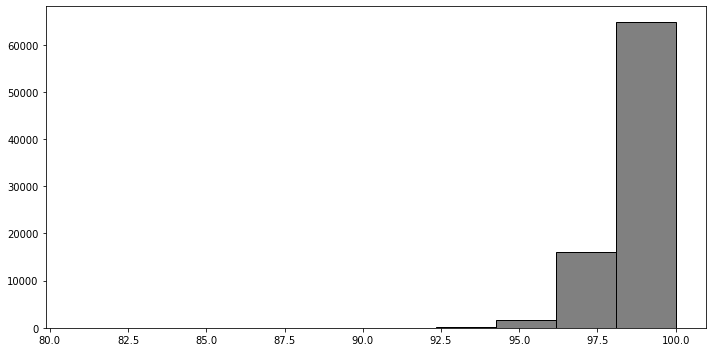

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_SÃO PAULO.jpeg
mean 98.5446508689171
median 98.63387978142076
mode 98.9041095890411
       Code  Year     Outlier      State
0  01947018  1958   99.452055  SÃO PAULO
1  01947018  1959   97.260274  SÃO PAULO
2  01947018  1960   98.633880  SÃO PAULO
3  01947018  1961   98.630137  SÃO PAULO
4  01947018  1962   97.260274  SÃO PAULO
5  01947018  1963  100.000000  SÃO PAULO
6  01947020  1967   99.726027  SÃO PAULO
7  01947020  1968   99.180328  SÃO PAULO
8  01947020  1969   98.356164  SÃO PAULO
9  01947020  1970   98.630137  SÃO PAULO
RIO DE JANEIRO
1 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 463


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


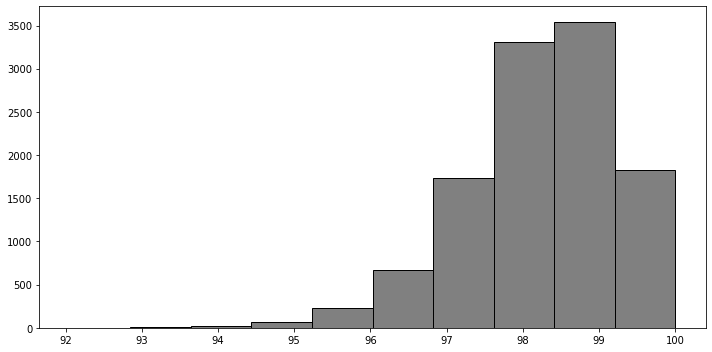

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_RIO DE JANEIRO.jpeg
mean 98.30812094570025
median 98.35616438356165
mode 98.9041095890411
       Code  Year    Outlier           State
0  02041046  1967  99.726027  RIO DE JANEIRO
1  02041046  1968  98.633880  RIO DE JANEIRO
2  02041046  1969  96.986301  RIO DE JANEIRO
3  02041046  1970  98.904110  RIO DE JANEIRO
4  02041046  1971  98.082192  RIO DE JANEIRO
5  02041046  1972  96.994536  RIO DE JANEIRO
6  02041046  1973  98.356164  RIO DE JANEIRO
7  02041046  1974  99.178082  RIO DE JANEIRO
8  02041046  1975  97.534247  RIO DE JANEIRO
9  02041046  1976  96.994536  RIO DE JANEIRO
PARANÁ
1 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


540 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


541 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


542 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


543 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


544 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


545 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


546 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


547 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


548 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


549 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


550 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


551 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


552 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


553 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


554 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


555 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


556 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


557 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


558 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


559 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


560 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


561 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


562 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


563 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


564 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


565 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


566 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


567 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


568 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


569 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


570 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


571 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


572 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


573 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


574 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


575 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


576 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


577 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


578 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


579 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


580 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


581 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


582 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


583 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


584 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


585 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


586 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


587 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


588 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


589 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


590 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


591 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


592 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


593 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


594 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


595 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


596 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


597 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


598 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


599 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


600 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


601 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


602 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


603 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


604 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


605 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


606 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


607 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


608 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


609 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


610 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


611 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


612 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


613 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


614 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


615 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


616 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


617 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


618 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


619 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


620 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


621 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


622 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


623 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


624 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


625 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


626 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


627 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


628 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


629 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


630 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


631 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


632 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


633 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


634 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


635 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


636 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


637 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


638 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


639 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


640 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


641 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


642 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


643 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


644 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


645 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


646 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


647 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


648 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


649 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


650 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


651 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


652 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


653 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


654 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


655 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


656 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


657 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


658 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


659 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


660 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


661 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


662 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


663 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


664 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


665 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


666 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


667 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


668 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


669 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


670 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


671 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


672 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


673 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


674 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


675 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


676 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


677 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


678 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


679 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


680 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


681 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


682 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


683 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


684 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


685 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


686 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


687 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


688 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


689 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


690 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


691 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


692 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


693 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


694 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


695 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


696 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


697 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


698 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


699 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


700 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


701 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


702 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


703 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


704 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


705 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


706 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


707 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


708 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


709 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


710 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


711 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


712 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


713 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


714 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


715 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


716 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


717 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


718 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


719 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


720 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


721 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


722 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


723 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


724 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


725 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


726 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


727 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


728 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


729 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


730 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


731 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


732 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


733 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


734 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


735 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


736 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


737 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


738 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


739 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


740 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


741 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


742 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


743 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


744 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


745 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


746 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


747 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


748 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


749 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


750 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


751 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


752 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


753 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


754 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


755 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


756 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


757 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


758 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


759 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


760 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


761 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


762 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


763 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


764 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


765 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


766 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


767 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


768 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


769 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


770 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


771 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


772 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


773 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


774 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


775 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


776 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


777 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


778 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


779 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


780 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


781 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


782 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


783 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


784 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


785 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


786 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


787 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


788 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


789 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


790 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


791 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


792 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


793 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


794 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


795 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


796 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


797 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


798 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


799 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


800 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


801 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


802 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


803 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


804 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


805 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


806 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


807 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


808 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


809 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


810 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


811 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


812 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


813 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


814 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


815 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


816 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


817 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


818 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


819 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


820 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


821 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


822 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


823 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


824 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


825 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


826 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


827 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


828 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


829 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


830 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


831 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


832 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


833 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


834 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


835 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


836 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


837 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


838 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


839 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


840 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


841 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


842 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


843 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


844 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


845 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


846 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


847 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


848 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


849 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


850 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


851 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


852 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


853 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


854 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


855 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


856 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


857 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


858 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


859 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


860 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


861 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


862 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


863 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


864 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


865 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


866 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


867 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


868 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


869 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


870 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


871 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


872 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


873 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


874 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


875 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


876 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


877 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


878 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


879 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


880 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


881 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


882 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


883 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


884 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


885 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


886 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


887 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


888 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


889 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


890 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


891 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


892 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


893 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


894 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


895 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


896 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


897 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


898 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


899 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


900 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


901 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


902 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


903 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


904 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


905 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


906 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


907 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


908 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


909 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


910 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


911 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


912 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


913 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


914 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


915 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


916 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


917 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


918 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


919 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


920 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


921 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


922 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


923 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


924 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


925 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


926 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


927 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


928 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


929 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


930 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


931 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


932 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


933 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


934 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


935 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


936 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


937 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


938 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


939 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


940 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


941 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


942 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


943 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


944 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


945 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


946 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


947 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


948 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


949 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


950 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


951 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


952 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


953 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


954 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


955 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


956 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


957 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


958 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


959 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


960 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


961 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


962 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


963 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


964 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


965 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


966 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


967 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


968 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


969 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


970 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


971 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


972 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


973 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


974 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


975 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


976 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


977 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


978 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


979 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


980 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


981 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


982 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


983 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


984 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


985 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


986 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


987 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


988 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


989 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


990 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


991 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


992 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


993 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


994 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


995 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


996 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


997 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


998 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


999 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1000 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1001 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1002 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1003 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1004 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1005 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1006 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1007 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1008 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1009 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1010 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1011 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1012 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1013 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1014 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1015 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1016 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1017 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1018 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1019 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1020 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1021 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1022 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1023 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1024 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1025 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1026 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1027 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1028 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1029 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1030 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1031 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1032 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1033 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1034 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1035 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1036 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1037 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1038 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1039 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1040 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1041 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1042 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1043 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1044 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1045 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1046 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1047 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1048 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1049 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1050 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1051 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1052 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1053 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1054 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1055 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1056 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1057 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1058 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1059 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1060 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1061 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1062 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1063 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1064 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1065 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1066 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1067 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1068 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1069 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1070 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1071 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1072 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1073 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1074 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1075 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1076 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1077 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1078 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1079 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1080 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1081 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1082 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1083 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1084 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1085 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1086 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1087 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1088 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1089 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1090 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1091 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1092 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1093 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1094 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1095 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1096 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1097 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1098 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1099 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1100 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1101 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1102 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1103 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1104 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1105 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1106 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1107 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1108 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1109 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1110 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1111 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1112 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1113 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1114 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1115 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1116 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1117 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1118 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1119 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1120 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1121 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1122 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1123 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1124 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1125 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1126 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1127 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1128 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1129 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1130 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1131 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1132 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1133 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1134 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1135 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1136 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1137 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1138 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1139 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1140 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1141 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1142 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1143 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1144 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1145 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1146 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1147 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1148 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1149 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1150 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1151 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1152 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1153 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1154 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1155 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1156 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1157 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1158 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1159 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1160 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1161 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1162 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1163 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1164 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1165 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1166 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1167 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1168 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1169 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1170 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1171 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1172 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1173 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1174 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1175 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1176 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1177 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1178 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1179 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1180 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1181 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1182 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1183 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


1184 / 1185


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


1185 / 1185


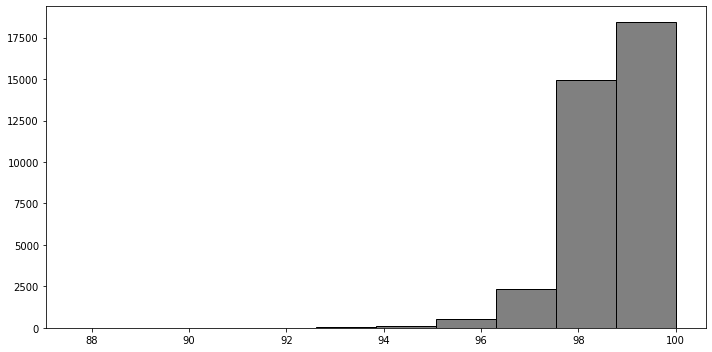

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_PARANÁ.jpeg
mean 98.64833063011216
median 98.9041095890411
mode 98.9041095890411
       Code  Year    Outlier   State
0  02250028  1975  98.904110  PARANÁ
1  02250028  1976  99.180328  PARANÁ
2  02250028  1977  99.178082  PARANÁ
3  02250028  1978  99.178082  PARANÁ
4  02250028  1979  99.452055  PARANÁ
5  02250028  1980  98.360656  PARANÁ
6  02250028  1981  98.630137  PARANÁ
7  02250028  1982  98.904110  PARANÁ
8  02250028  1983  98.356164  PARANÁ
9  02250028  1984  99.453552  PARANÁ
SANTA CATARINA
1 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 268


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


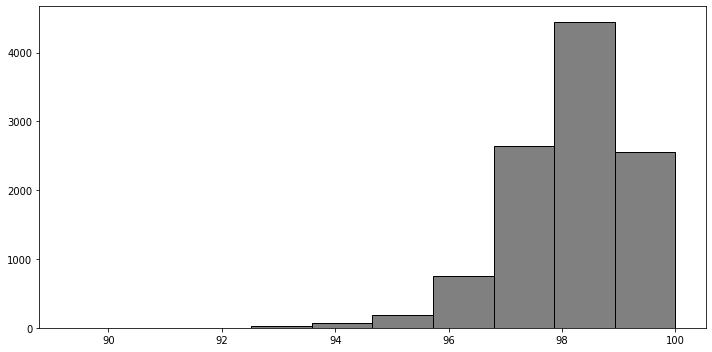

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_SANTA CATARINA.jpeg
mean 98.22765953328016
median 98.35616438356165
mode 98.35616438356165
       Code  Year    Outlier           State
0  02648000  1935  98.630137  SANTA CATARINA
1  02648000  1936  98.087432  SANTA CATARINA
2  02648000  1937  96.986301  SANTA CATARINA
3  02648000  1938  98.630137  SANTA CATARINA
4  02648000  1939  95.342466  SANTA CATARINA
5  02648000  1940  96.994536  SANTA CATARINA
6  02648000  1941  98.904110  SANTA CATARINA
7  02648000  1942  98.356164  SANTA CATARINA
8  02648000  1943  97.534247  SANTA CATARINA
9  02648000  1944  97.814208  SANTA CATARINA
RIO GRANDE DO SUL
1 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


2 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


3 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


4 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


5 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


6 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


7 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


8 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


9 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


10 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


11 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


12 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


13 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


14 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


15 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


16 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


17 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


18 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


19 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


20 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


21 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


22 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


23 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


24 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


25 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


26 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


27 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


28 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


29 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


30 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


31 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


32 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


33 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


34 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


35 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


36 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


37 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


38 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


39 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


40 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


41 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


42 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


43 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


44 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


45 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


46 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


47 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


48 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


49 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


50 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


51 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


52 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


53 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


54 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


55 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


56 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


57 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


58 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


59 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


60 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


61 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


62 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


63 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


64 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


65 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


66 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


67 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


68 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


69 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


70 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


71 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


72 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


73 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


74 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


75 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


76 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


77 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


78 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


79 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


80 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


81 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


82 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


83 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


84 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


85 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


86 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


87 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


88 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


89 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


90 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


91 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


92 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


93 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


94 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


95 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


96 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


97 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


98 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


99 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


100 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


101 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


102 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


103 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


104 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


105 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


106 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


107 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


108 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


109 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


110 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


111 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


112 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


113 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


114 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


115 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


116 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


117 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


118 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


119 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


120 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


121 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


122 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


123 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


124 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


125 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


126 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


127 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


128 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


129 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


130 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


131 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


132 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


133 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


134 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


135 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


136 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


137 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


138 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


139 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


140 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


141 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


142 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


143 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


144 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


145 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


146 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


147 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


148 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


149 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


150 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


151 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


152 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


153 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


154 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


155 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


156 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


157 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


158 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


159 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


160 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


161 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


162 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


163 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


164 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


165 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


166 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


167 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


168 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


169 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


170 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


171 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


172 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


173 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


174 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


175 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


176 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


177 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


178 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


179 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


180 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


181 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


182 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


183 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


184 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


185 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


186 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


187 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


188 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


189 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


190 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


191 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


192 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


193 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


194 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


195 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


196 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


197 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


198 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


199 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


200 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


201 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


202 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


203 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


204 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


205 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


206 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


207 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


208 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


209 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


210 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


211 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


212 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


213 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


214 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


215 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


216 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


217 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


218 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


219 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


220 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


221 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


222 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


223 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


224 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


225 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


226 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


227 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


228 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


229 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


230 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


231 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


232 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


233 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


234 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


235 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


236 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


237 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


238 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


239 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


240 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


241 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


242 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


243 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


244 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


245 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


246 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


247 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


248 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


249 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


250 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


251 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


252 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


253 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


254 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


255 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


256 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


257 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


258 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


259 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


260 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


261 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


262 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


263 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


264 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


265 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


266 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


267 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


268 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


269 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


270 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


271 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


272 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


273 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


274 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


275 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


276 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


277 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


278 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


279 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


280 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


281 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


282 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


283 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


284 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


285 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


286 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


287 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


288 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


289 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


290 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


291 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


292 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


293 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


294 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


295 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


296 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


297 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


298 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


299 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


300 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


301 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


302 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


303 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


304 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


305 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


306 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


307 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


308 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


309 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


310 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


311 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


312 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


313 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


314 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


315 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


316 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


317 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


318 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


319 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


320 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


321 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


322 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


323 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


324 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


325 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


326 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


327 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


328 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


329 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


330 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


331 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


332 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


333 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


334 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


335 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


336 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


337 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


338 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


339 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


340 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


341 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


342 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


343 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


344 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


345 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


346 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


347 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


348 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


349 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


350 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


351 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


352 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


353 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


354 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


355 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


356 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


357 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


358 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


359 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


360 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


361 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


362 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


363 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


364 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


365 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


366 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


367 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


368 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


369 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


370 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


371 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


372 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


373 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


374 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


375 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


376 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


377 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


378 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


379 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


380 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


381 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


382 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


383 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


384 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


385 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


386 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


387 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


388 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


389 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


390 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


391 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


392 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


393 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


394 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


395 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


396 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


397 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


398 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


399 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


400 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


401 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


402 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


403 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


404 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


405 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


406 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


407 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


408 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


409 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


410 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


411 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


412 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


413 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


414 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


415 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


416 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


417 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


418 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


419 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


420 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


421 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


422 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


423 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


424 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


425 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


426 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


427 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


428 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


429 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


430 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


431 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


432 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


433 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


434 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


435 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


436 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


437 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


438 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


439 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


440 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


441 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


442 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


443 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


444 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


445 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


446 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


447 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


448 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


449 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


450 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


451 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


452 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


453 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


454 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


455 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


456 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


457 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


458 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


459 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


460 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


461 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


462 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


463 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


464 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


465 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


466 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


467 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


468 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


469 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


470 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


471 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


472 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


473 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


474 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


475 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


476 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


477 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


478 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


479 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


480 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


481 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


482 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


483 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


484 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


485 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


486 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


487 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


488 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


489 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


490 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


491 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


492 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


493 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


494 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


495 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


496 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


497 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


498 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


499 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


500 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


501 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


502 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


503 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


504 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


505 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


506 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


507 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


508 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


509 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


510 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


511 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


512 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


513 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


514 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


515 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


516 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


517 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


518 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


519 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


520 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


521 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


522 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


523 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


524 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


525 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


526 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


527 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


528 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


529 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


530 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


531 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


532 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


533 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


534 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


535 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


536 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


537 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


538 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month


539 / 540


C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_station['Month'] = df_temp_station['Date'].dt.month
C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1371173484.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_q_outlier.to_hdf(general_path + '/Quality/Q2/BRASIL_Q3_OUTLIER_'+state+'.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


540 / 540


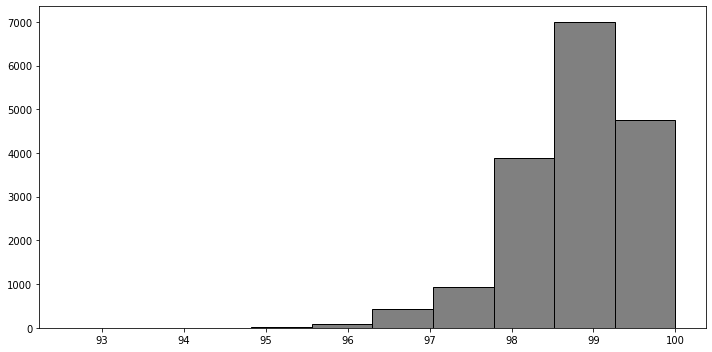

C:/Users/linde/OneDrive/Hidroweb/Figures/q3_outlier_RIO GRANDE DO SUL.jpeg
mean 98.79198641288578
median 98.9041095890411
mode 99.17808219178082
       Code  Year    Outlier              State
0  02751005  1935  98.356164  RIO GRANDE DO SUL
1  02751005  1937  99.178082  RIO GRANDE DO SUL
2  02751005  1938  98.356164  RIO GRANDE DO SUL
3  02751005  1939  98.082192  RIO GRANDE DO SUL
4  02751005  1940  98.907104  RIO GRANDE DO SUL
5  02751005  1941  96.438356  RIO GRANDE DO SUL
6  02751005  1942  98.630137  RIO GRANDE DO SUL
7  02751005  1943  98.356164  RIO GRANDE DO SUL
8  02751005  1944  99.180328  RIO GRANDE DO SUL
9  02751005  1945  99.726027  RIO GRANDE DO SUL


In [31]:
for state in states:
    calculateP(state)

In [37]:
all_files = glob.glob(general_path + '/Quality/Q3/*.h5')
# print(all_files)
count = 0
df = []
for filename in all_files:
    df = pd.read_hdf(filename)
    df.reset_index(inplace=True, drop = True)
#     print(df)
    if count == 0:
        df_total = df.copy(deep = True)
    else:
        df_total = pd.concat([df_total, df], ignore_index = True)
    count = count + 1
    print("File", count,"|", filename)
print(count, "files are loaded")

File 1 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_ACRE.h5
File 2 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_ALAGOAS.h5
File 3 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_AMAPÁ.h5
File 4 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_AMAZONAS.h5
File 5 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_BAHIA.h5
File 6 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_CEARÁ.h5
File 7 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_DISTRITO FEDERAL.h5
File 8 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_ESPÍRITO SANTO.h5
File 9 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_GOIÁS.h5
File 10 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_MARANHÃO.h5
File 11 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_MATO GROSSO DO SUL.h5
File 12 | C:/Users/linde/OneDrive/Hidroweb/Quality/Q3\BRASIL_Q3_OUTLIER_MATO G

In [38]:
df_total.to_hdf(general_path + '/Quality/BRASIL_Q3.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
df_total

C:\Users\linde\AppData\Local\Temp\ipykernel_31064\1855875919.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Code', 'Year', 'State'], dtype='object')]

  df_total.to_hdf(general_path + '/Quality/BRASIL_Q3.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


Code  Year     Outlier      State
0       00771001  1982   99.452055       ACRE
1       00771001  1983   98.630137       ACRE
2       00771001  1984   98.633880       ACRE
3       00771001  1985  100.000000       ACRE
4       00771001  1986   99.452055       ACRE
...          ...   ...         ...        ...
378656  01348002  1995   97.808219  TOCANTINS
378657  01348002  1996   98.633880  TOCANTINS
378658  01348002  1997   99.178082  TOCANTINS
378659  01348002  1998   99.178082  TOCANTINS
378660  01348002  1999   99.726027  TOCANTINS

[378661 rows x 4 columns]